Мы постоянно анализируем разные вещи - поведение пользователей, части продукта, “здоровье” бизнеса в целом и по частям. В этом задании мы предлагаем тебе набор заданий над одним из главных источников данных в KazanExpress - транзакциями.

Каждая строка этого датасета - позиция в заказе, совершенном покупателем KE.

# Задачи

### 1 - Исследовательский анализ данных
Предлагается в свободном формате исследовать данные.

Изучи данные, чтобы:

- Описать их
- Найти неожиданные выводы
- Заложить гипотезы для улучшения продукта

### 2 - Основные метрики
Работа продуктового аналитика непосредственно связана с метриками.

Выпиши основные метрики, за которыми важно следить в маркетплейсе KazanExpress. Посчитай те, которые можно вычислить из текущего набора данных. Изучи эти метрики и предложи способы их роста.

### 3 - Искусственный эксперимент

Предположим, что city_id - не идентификатор города, а идентификатор группы, где одна из них контрольная, а другая экспериментальная.

- 3.1 Какая из групп ведет себя лучше, согласно метрикам из прошлого пункта? Как это измерить?
- 3.2 Какие еще исследования полезно провести, чтобы проводить эксперименты в будущем?


Описание данных:
- day_of_week - Порядковый день недели
- hour_of_day - Час создания заказа
- city_id - ID города, куда доставят заказ
- item_value - Стоимость штуки товара, взятая из искусственного распределения, похожего на настоящее
- items_amount - Количество штук товара в позиции
- order_id - ID заказа, к которому принадлежат несколько позиций
- account_id - ID покупателя
- l1_category_title - Категория 1 уровня
- l2_category_title - Категория 2 уровня
- l3_category_title - Категория 3 уровня
- last_level_category_title - Категория последнего уровня


## Результаты
### EDA
#### Самые общие распределения: распределение чеков, дохода от покупателей, количества вещей в заказе, количества вещей на покупателя
- В данных есть как и товары с нулевой стоимостью, так и товар на огромную сумму. Соответственно, есть и заказы с нулевой суммой. При дальнейшем анализе нулевых покупок я предположила две возможно причины их наличия: 
    - Возможно, есть какая-то ошибка при записи данных
    - Бонусная система, позволяющая полностью оплатить покупку. Нулевые товары принадлежат к разным категориям, так что вполне вероятно, что так оно и есть
- И для чеков, и для количества товаров в корзине есть выбросы, что отдаляет распределения от нормальных. В случае чеков среднее практически в 7 раз больше, чем медиана, в случае количества товаров средняя лишь в полтора раза больше медианы.
- И для суммарного дохода с клиента, и для числа товаров на клиента есть выбросы и расхождение значений средних и медиан. Средний доход с пользователя примерно в 7 раз выше, чем медиана. Среднее значение количества товаров на клиента примерно в полтора раза больше медианы.
- Существует слабая взаимосвязь между доходом с клиента и количеством приобретённых им товаров(r Пирсона = 0.11) 

#### Категории: доход и товары
- Большую часть дохода приносит категория "электроника", остальные категории значительно отстают. Средний доход с категорий сохраняет ту же тенденцию.

- Тем не менее, само количество проданных товаров распределено не так резко! Здесь также лидер электроника, на втором месте красота, на третьем - товары для дома. Зато среднее количество проданных товаров имеет другое распределение: здесь первые места занимают продукты питания, строительство и канцтовары, а элетроника, бытовая техника, товары для взрослых находятся в конце. Это можно объяснить просто: чем дешевле товар, тем больше его единиц покупают, тогда как электронику и бытовую технику берут в небольшом количестве.

#### Города: заказы(AOV, MOV), категории, клиенты(уники, ARPU, MRPU, DAU)

- Суммарно доход с города 689 выше, чем доход с города 44. 
- AOV по полным выборкам, включающим выбросы, статистически значимо не различается. - Welch ttest
- AOV по выборкам без выбросов(усечённое среднее), статистически значимо выше в городе 44.  - Welch ttest
- MOV(медиана суммы заказа) по полным выборкам статистически значимо выше у города 44. - Bootstrap

- Клиентов в городе 689 больше, чем в 44, но не статистически значимо. - Хи-квадрат 
- ARPU по полным выборкам, включающим выбросы, статистически значимо не различается. - Welch ttest
- ARPU по выборкам без выбросов(усечённое среднее), статистически значимо выше в городе 44.  - Welch ttest
- MRPU(медиана дохода с пользователя) по полным выборкам статистически значимо выше у города 44. - Bootstrap
- DAU за каждый день выше у города 689. Для города 44 DAU последовательно растёт по городам, DAU для города 689 растёт с 1 по 4 день, падает на уровень третьего в пятый день, и достигает максимума в 6 день

- Большая часть дохода для обоих городов приходится на категорию электроники, для города 689 этот доход выше, для среднего дохода соотношение сохраняется. 

- Больше всего было продано товаров из категории электроники, красоты, товаров для дома, во всех трёх категориях было больше продано в городе 689. По среднему количеству проданных товаров лидируют продукты питания, строительство и ремонт, канцтовары. Для первых двух категорий среднее значение выше для города 689, для канцтоваров город 44

#### Дни: DAU, заказы(AOV, MOV), количество вещей в заказе
- Суммарный доход в заказов в день изменяется циклично! С нулевого дня по третий день он падает, и то же самое происходит с 4 по 6 день. Самый высокий доход приходится на 0,4,5 день, самый низкий на 3 день
- Та же закономерность сохраняется и для AOV
- Для MOV наблюдается другая картина: распределение по дням равномерное.
- DAU выглядит равномерным, больше всего клиентов было в 4 день, меньше всего в 5 день. 
- Статистически значимой взаимосвязи между DAU и днём нет. - Хи-квадрат
- Распределение заказов по дням повторяет DAU: выглядит равномерным, больше всего клиентов было в 4 день, меньше всего в 5 день.
- Больше всего товаров суммарно было продано в 4 день, меньше всего - в 0 день. Распределение средних более сглаженно, лидирует 5 день, меньше всего средняя в 0 день.

#### Часы: уникальные заказы, суммы заказов

- За эти 6 дней меньше всего заказов было совершено в период с 0 до 4 часов ночи, с 4 до 9 часов идёт активный рост числа заказов, с 9 до 21 рост продолжается, но не с такой скоростью. С 21 по 23 наблюдается резкий спад. Самым активным временем заказов можно считать период с 18 до 21 часа.
- График распределения сумм заказов не такой плавный, как график количества заказов. Здесь есть пики - 1 час, 11 часов 13 часов, 17 часов и 21 час. Самыми прибыльными часами можно назвать 13 и 17 часов. Самые низкая прибыль пришлась на 2 часа ночи, в целом период с 2 до 7 можно считать наименее прибыльным.

#### Топовые клиенты
- Топ клиенты были отобраны от 99 квантиля(включительно) и выше  по доходу
- Количество топовых клиентов =  276
- Разница в доходе от топ клиентов и обычных значительная. Доверительные интервалы, построенные с помощью метода складного ножа, не пересекаются, что позволяет сделать вывод о том, что суммарный доход от топ-клиентов и обычных клиентов статистически значимо различается.
- Статистически значимой взаимосвязи между количеством топовых клиентов и городом не выявлено, их количество в городах примерно одинаково. Хи-квадрат
- Самые востребованные категории: электроника, красота, товары для дома.
- Есть клиенты-магазины, которые закупали только товары одной категории, они составляют 36 % от числа топ клиентов

### Основные метрики
Перечисленные ниже метрики посчитаны в коде в тех или иных разрезах. 
 - ARPU
 - MRPU
 - AOV
 - MOV
 - DAU
 
 Также есть метрики, за которыми стоит следить в маркетплейсе, но их посчитать не основе полученных данных не получится
 - MAU, WAU
 - retention
 - ARPPU
 - LTV
 
**На основе проведённого анализа можно предложить следующие улучшения для продукта:**
- Известно, что более прибыльные заказы совершаются в в 13 и 17 часов. Можно настроить пуши конкретно на это время с напоминаниями о просмотренных товарах/выгодных предложениях. Это повлияет на **ARPU, ARPPU, DAU, retention, LTV**
- В городе 44 средний пользователь платит больше. Им можно предлагать более дорогие товары, чем пользователям города 689. Это повлияет на **ARPU, AOV, LTV**
- Электроника, красота, товары для дома - это те категории, на которые стоит обратить внимание при составлении акций, рекомендаций. Также стоит особенно проработать систему фильтрации именно для этих категорий, чтобы покупателю было легче найти нужное. Это повлияет на  **ARPU,ARRPU, AOV, LTV**
- Большая часть дохода приходится на топовых клиентов, 36% из них - клиенты-магазины. Скорее всего, они будут постоянно брать примерно один и тот же набор товаров. Им можно сообщать о снижении цен и акциях на эти товары, а также предлагать альтернативные по меньшей цене.  Это повлияет на **ARPU, AOV, DAU, retention, LTV**

### Искусственный эксперимент
Результаты по эксперименту обобщённо изложены выше, в самом коде всё обсуждается подробнее. 

Помимо произведённых тестов следует выяснить, что происходит с метриками, которые тяжело сосчитать на приведённых данных: LTV, ARPPU, retention. В обоих городах есть выбросы, которые сильно влияют на оценку тестов, и нужно больше времени, чтобы понять, насколько эти значения-выбросы устойчивы, какие из топовых клиентов постоянны, а какие нет.

#### Раскатывать ли фичу?
Если считать город 44 контрольным, а 689 экспериментальным, **раскатывать фичу не стоит**, потому что:

- Суммарно доход с города 689 выше, чем доход с города 44. 
- AOV по полным выборкам, включающим выбросы, статистически значимо не различается. - Welch ttest
- AOV по выборкам без выбросов(усечённое среднее), статистически значимо выше в городе 44.  - Welch ttest
- MOV(медиана суммы заказа) по полным выборкам статистически значимо выше у города 44. - Bootstrap

- Клиентов в городе 689 больше, чем в 44, но не статистически значимо. - Хи-квадрат 
- ARPU по полным выборкам, включающим выбросы, статистически значимо не различается. - Welch ttest
- ARPU по выборкам без выбросов(усечённое среднее), статистически значимо выше в городе 44.  - Welch ttest
- MRPU(медиана дохода с пользователя) по полным выборкам статистически значимо выше у города 44. - Bootstrap

Статистически значимой разницы по полной выборке нет, без выбросов AOV и ARPU статистически значимо выше у города 44, как и медиана по полным выборкам, что сходится. Статистически значимой разницы по количеству клиентов для двух городов нет. Да, суммарно доход выше с города 689 - но это, скорее всего, случайный результат, связанный, например, с тем, что эксперимент пришёлся на дату закупки оптовика из города 689


Итак, приступим!

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

In [2]:
def get_info(df): #функция для получения shape, types и количества NAN в колонках
    shape = df.shape
    types = df.dtypes
    isna_sum = df.isna().sum()
    dict = {"shape": shape, "types":types, "NAN" : isna_sum}
    return dict

In [3]:
#стили графиков
sns.set (
    font_scale =1.5,
    style = 'whitegrid',
    rc= {'figure.figsize': (30,7)}
)

### Общий обзор данных

Предварительно скажу: у дф слетели имена колонок, потому я поправлю это сразу при чтении, чтобы не раздувать код

In [4]:
df = pd.read_csv('data.csv', 
    names = ['day_of_week','hour_of_day','city_id','item_value','items_amount','order_id','account_id',
             'l1_category_title', 'l2_category_title','l3_category_title', 'last_level_category_title' ])

In [5]:
df.head()

,day_of_week,hour_of_day,city_id,item_value,items_amount,order_id,account_id,l1_category_title,l2_category_title,l3_category_title,last_level_category_title
0,6,22,44,457,1,e607818bc6d877434ed0cf325ec9150b,f4277b9ec7e3af182af23ce0bbe58e27,Электроника,Наушники и аудиотехника,Наушники,Проводные наушники
1,6,22,44,300,1,e607818bc6d877434ed0cf325ec9150b,f4277b9ec7e3af182af23ce0bbe58e27,Электроника,Наушники и аудиотехника,Наушники,Проводные наушники
2,6,22,44,59,1,e607818bc6d877434ed0cf325ec9150b,f4277b9ec7e3af182af23ce0bbe58e27,Продукты питания,"Шоколад, конфеты, сладости",Другое,Другое
3,6,22,689,2147,1,6f24be04fc5fdd683b29e22d22a45fd8,a2759c331eb65c784200dfdf4a7a15e8,Товары для взрослых,Товары для БДСМ,Товары для БДСМ,Товары для БДСМ
4,6,22,689,2553,1,6f24be04fc5fdd683b29e22d22a45fd8,a2759c331eb65c784200dfdf4a7a15e8,Красота,Макияж,Аксессуары для макияжа,Кисти и аксессуары


Так намного лучше. Смотрю дф дальше: форма, типы, NaN

In [6]:
get_info(df)

{'shape': (101556, 11),
 'types': day_of_week                   int64
 hour_of_day                   int64
 city_id                       int64
 item_value                    int64
 items_amount                  int64
 order_id                     object
 account_id                   object
 l1_category_title            object
 l2_category_title            object
 l3_category_title            object
 last_level_category_title    object
 dtype: object,
 'NAN': day_of_week                  0
 hour_of_day                  0
 city_id                      0
 item_value                   0
 items_amount                 0
 order_id                     0
 account_id                   0
 l1_category_title            0
 l2_category_title            0
 l3_category_title            0
 last_level_category_title    0
 dtype: int64}

Что же, чистенький дф!

In [7]:
print('Дни : ', np.sort(df.day_of_week.unique()))

Дни :  [0 1 3 4 5 6]


In [8]:
print('Часы : ', np.sort(df.hour_of_day.unique()))

Часы :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [9]:
print('Города : ', df.city_id.unique())

Города :  [ 44 689]


В исходном дф представлены наблюдения только за 6 дней(почему-то пропал день "2"), все 24 часа на месте, представлено всего 2 города.

#### Теперь можно посмотреть на закономерности внутри продукта. Первое, что приходит в голову:
- В дф есть отдельно цена, отдельно количество. Следует

    - получить из них колонку с полной суммой за конкретный товар в чеке
    - следом рассчитать полную сумму чека - в нашем случае полную сумму заказа.
    - рассчитать, сколько товаров суммарно в заказе(корзине)
    - рассчитать, на какую сумму совершил покупки каждый пользователь
    - рассчитать, сколько всего товаров купил каждый пользователь
    - Рассчитать AOV 


- Самые общие распределения: распределение чеков, дохода от покупателей, количества вещей в заказе
- Каково распределение уникальных заказов, уникальных пользователей, суммы покупок, количества проданных вещей по дням недели? По часам? По городам?
- Какие категории более востребованные?

####  Добавляю доход с каждого товара:

In [10]:
df['sum_item_value'] = df.item_value * df.items_amount

#### Добавляю order value, количество товаров в заказе:

In [11]:
check_items_by_order = df.groupby('order_id', as_index = False) \
    .agg({'sum_item_value' : sum, 'items_amount':sum}) \
    .rename(columns= {'sum_item_value' :'order_value', 'items_amount' : 'order_amount'})

In [12]:
check_items_by_order.head()

,order_id,order_value,order_amount
0,0001f74c8a2a27a20bb5694c0d09816c,9216,5
1,00035ad7e02b8cb19ab30d7cca296f52,26345,7
2,00041433fed420686e00c9d8ce735f55,5593,4
3,0004fe3286f190f8b93bb62c24003c8d,5550,5
4,00067006e0a0d6d21072d22cd493bc2b,973,1


Есть ли зависимость между суммой заказа и количеством товаров в корзине?

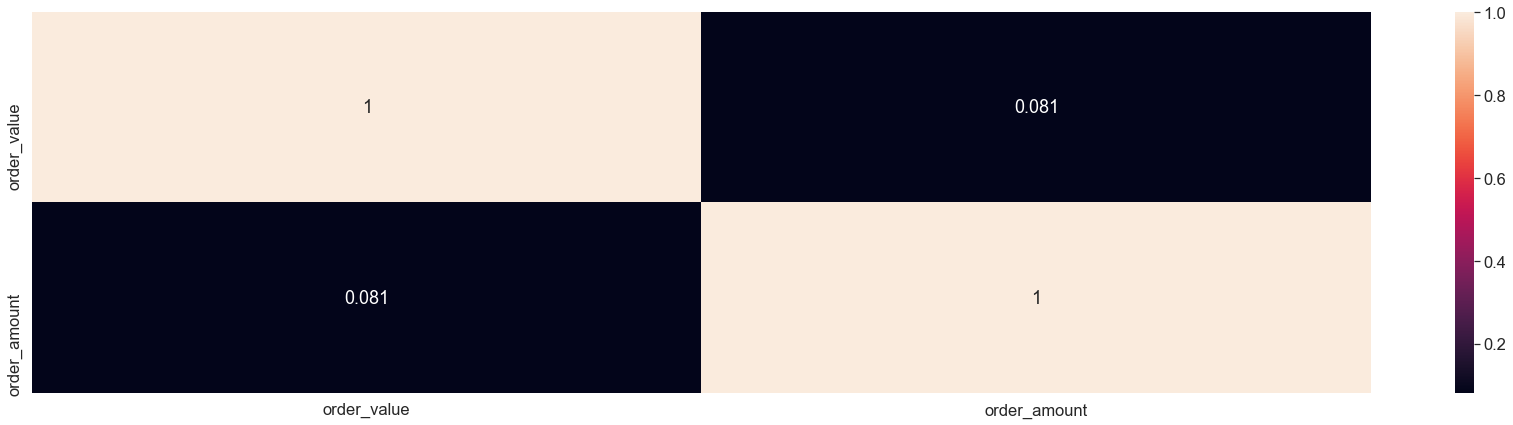

In [13]:
sns.heatmap(check_items_by_order[['order_value', 'order_amount']].corr(), annot = True)
plt.show()

Как видим, Пирсон даёт скромный результат - коэффициент 0.08 не дотягивает даже до слабой корреляции.

#### Рассчет дохода с пользователя, количества товаров одного пользователя

In [14]:
check_items_by_client = df.groupby('account_id', as_index = False) \
    .agg({'sum_item_value' : sum, 'items_amount':sum}) \
    .rename(columns= {'sum_item_value' :'revenue_by_client', 'items_amount' : 'amount_by_client'})

In [15]:
check_items_by_client.head()

,account_id,revenue_by_client,amount_by_client
0,000023168ff80fd6f08898dee71582b1,7405,9
1,000817038ab01d0aee903aa129b3addb,2664,1
2,0008f38fb67a8fd7549b1d074c1edc3f,49,1
3,0009d76d0149f5cfe17fdb4867b406a2,1638,1
4,000f77e7e6812a8b48bcaac41cafa692,4917,3


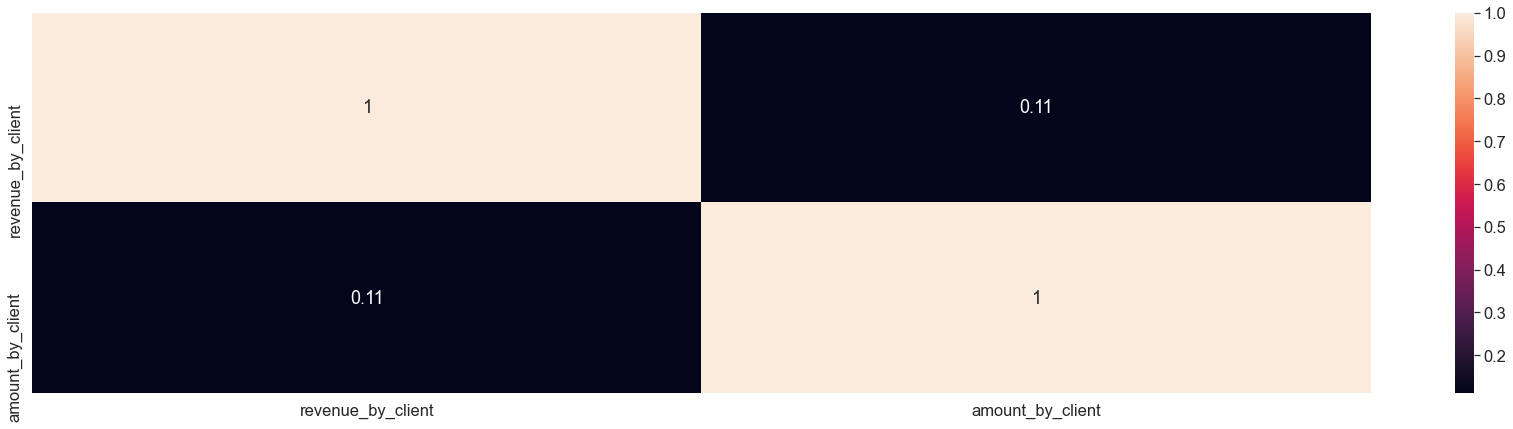

In [16]:
sns.heatmap(check_items_by_client[['revenue_by_client', 'amount_by_client']].corr(), annot = True)
plt.show()

А в этом случае коэффициент Пирсона равен 0.11, что можно интерпретировать как слабую взаимосвязь между доходом с клиента и количеством приобретённых им товаров 

Присоединяю 4 новых колонки, рассчитаных выше, к исходному дф:

In [17]:
df = df.merge(check_items_by_order, on = 'order_id')
df = df.merge(check_items_by_client, on = 'account_id')

In [18]:
df.head(3)

,day_of_week,hour_of_day,city_id,item_value,items_amount,order_id,account_id,l1_category_title,l2_category_title,l3_category_title,last_level_category_title,sum_item_value,order_value,order_amount,revenue_by_client,amount_by_client
0,6,22,44,457,1,e607818bc6d877434ed0cf325ec9150b,f4277b9ec7e3af182af23ce0bbe58e27,Электроника,Наушники и аудиотехника,Наушники,Проводные наушники,457,1189,4,1189,4
1,6,22,44,300,1,e607818bc6d877434ed0cf325ec9150b,f4277b9ec7e3af182af23ce0bbe58e27,Электроника,Наушники и аудиотехника,Наушники,Проводные наушники,300,1189,4,1189,4
2,6,22,44,59,1,e607818bc6d877434ed0cf325ec9150b,f4277b9ec7e3af182af23ce0bbe58e27,Продукты питания,"Шоколад, конфеты, сладости",Другое,Другое,59,1189,4,1189,4


In [19]:
df.shape[0]

101556

Дф содержит столько же строк, сколько и было сначала, так что всё смерджилось хорошо. 

### Самые общие распределения: распределение чеков, дохода от покупателей, количества вещей в заказе, количества вещей на покупателя

В самом общем виде данные можно оценить с помощью describe. 

In [20]:
df.describe().round(2)

,day_of_week,hour_of_day,city_id,item_value,items_amount,sum_item_value,order_value,order_amount,revenue_by_client,amount_by_client
count,101556.00,101556.00,101556.00,101556.00,101556.0,101556.00,101556.00,101556.00,1.015560e+05,101556.00
mean,3.18,14.91,386.26,3636.32,1.2,7861.70,24271.88,7.45,9.457605e+04,9.83
std,2.09,5.29,321.90,65337.30,1.5,286951.24,455627.54,11.21,2.677006e+06,12.93
min,0.00,0.00,44.00,0.00,1.0,0.00,0.00,1.00,1.000000e+00,1.00
25%,1.00,11.00,44.00,386.00,1.0,406.00,2419.75,2.00,3.612000e+03,3.00
50%,4.00,15.00,689.00,875.00,1.0,934.00,5351.00,4.00,7.690000e+03,6.00
75%,5.00,19.00,689.00,1911.00,1.0,2126.00,11916.00,9.00,1.683700e+04,12.00
max,6.00,23.00,689.00,5706091.00,250.0,45648728.00,45648728.00,356.00,1.242176e+08,356.00


Что сразу бросается в глаза? 
- В данных есть как и товары с нулевой стоимостью, так и товар на огромную сумму. Соответственно, есть и заказы с нулевой суммой.
- Количество одного типа товара в заказе варьируется от 1 до 250, медиана и 75 процентиль при этом - 1

Посмотрим распределение чеков и количества товаров в корзине. Здесь нам придёт на помощь заранее рассчитаный дф - check_items_by_order

In [21]:
check_items_by_order.describe().round(2)

,order_value,order_amount
count,37084.00,37084.00
mean,21529.58,3.29
std,522690.95,5.05
min,0.00,1.00
25%,1247.00,1.00
50%,2950.00,2.00
75%,6540.75,4.00
max,45648728.00,356.00


Так как на на полном объёме данных не получится построить внятный график, я отсеку по 0.025 квантилям по обеим сторонам распределения, то есть уберу самые маленькие и самые большие значения

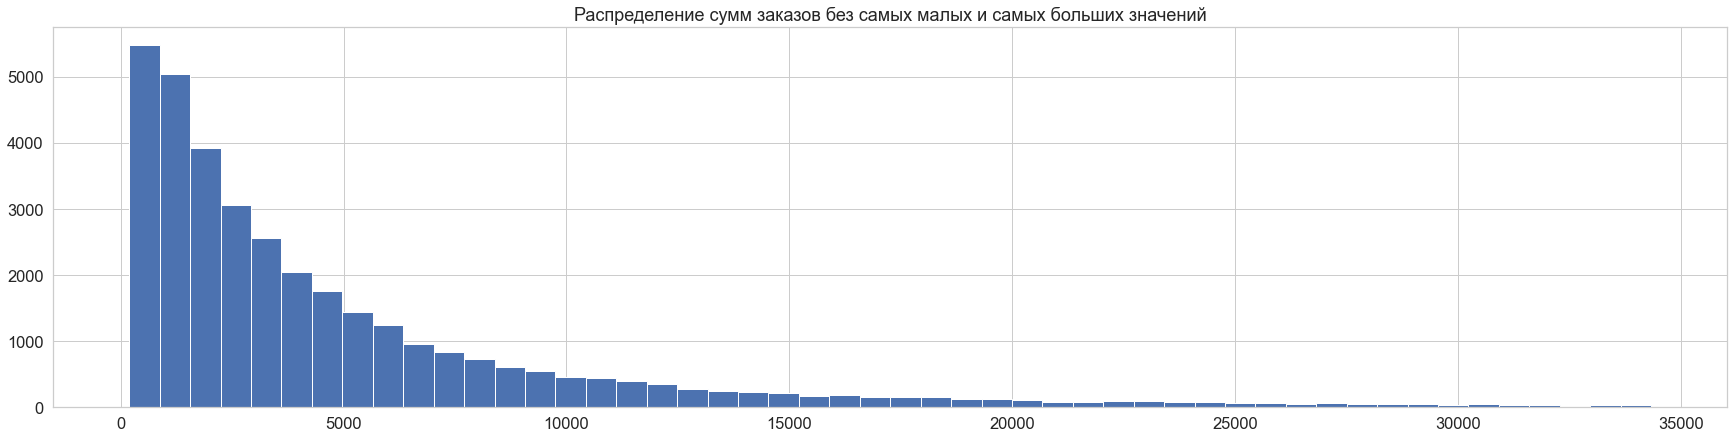

In [22]:
q_0025 = check_items_by_order.order_value.quantile(0.025)
q_0975 = check_items_by_order.order_value.quantile(0.975)
check_items_by_order.query('order_value > @q_0025 & order_value < @q_0975').order_value.hist(bins = 50)
plt.title('Распределение сумм заказов без самых малых и самых больших значений')
plt.show()

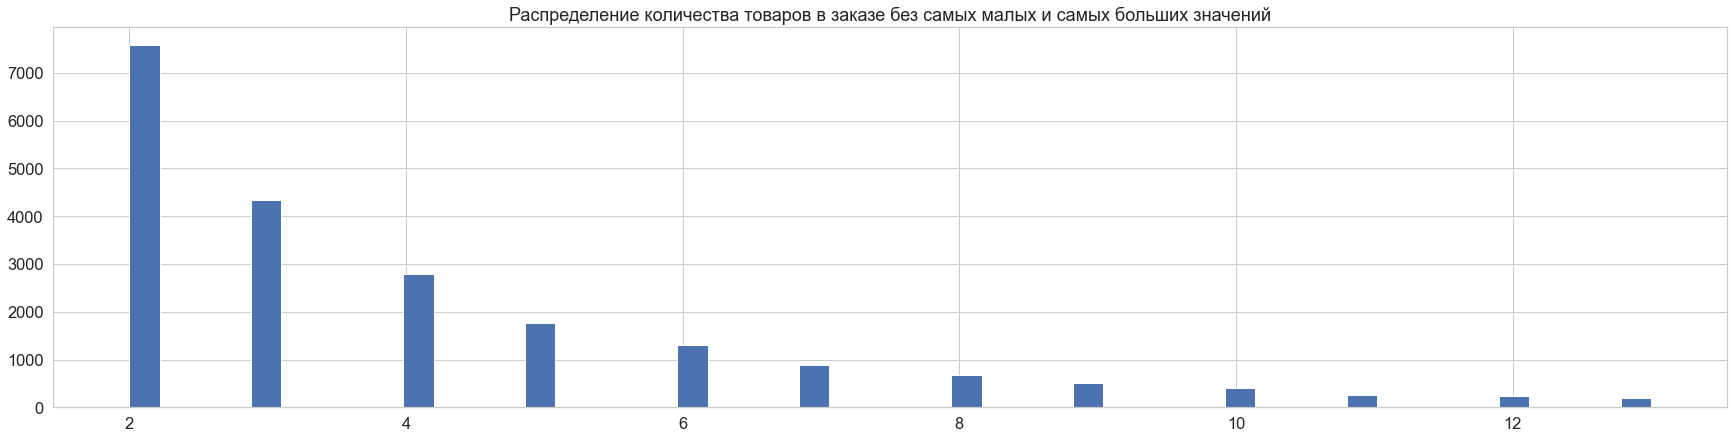

In [23]:
q_0025 = check_items_by_order.order_amount.quantile(0.025)
q_0975 = check_items_by_order.order_amount.quantile(0.975)
check_items_by_order.query('order_amount > @q_0025 & order_amount < @q_0975').order_amount.hist(bins = 50)
plt.title('Распределение количества товаров в заказе без самых малых и самых больших значений')
plt.show()

Какие выводы можно сделать сразу?
- И для чеков, и для количества товаров в корзине есть выбросы, что отдаляет распределения от нормальных. В случае чеков среднее практически в 7 раз больше, чем медиана, в случае количества товаров средняя лишь в полтора раза больше медианы.

То же самое по клиентам:

In [24]:
check_items_by_client.describe().round(1)

,revenue_by_client,amount_by_client
count,27563.0,27563.0
mean,28966.5,4.4
std,1217251.1,6.4
min,1.0,1.0
25%,1827.0,1.0
50%,4116.0,3.0
75%,9034.5,5.0
max,124217597.0,356.0


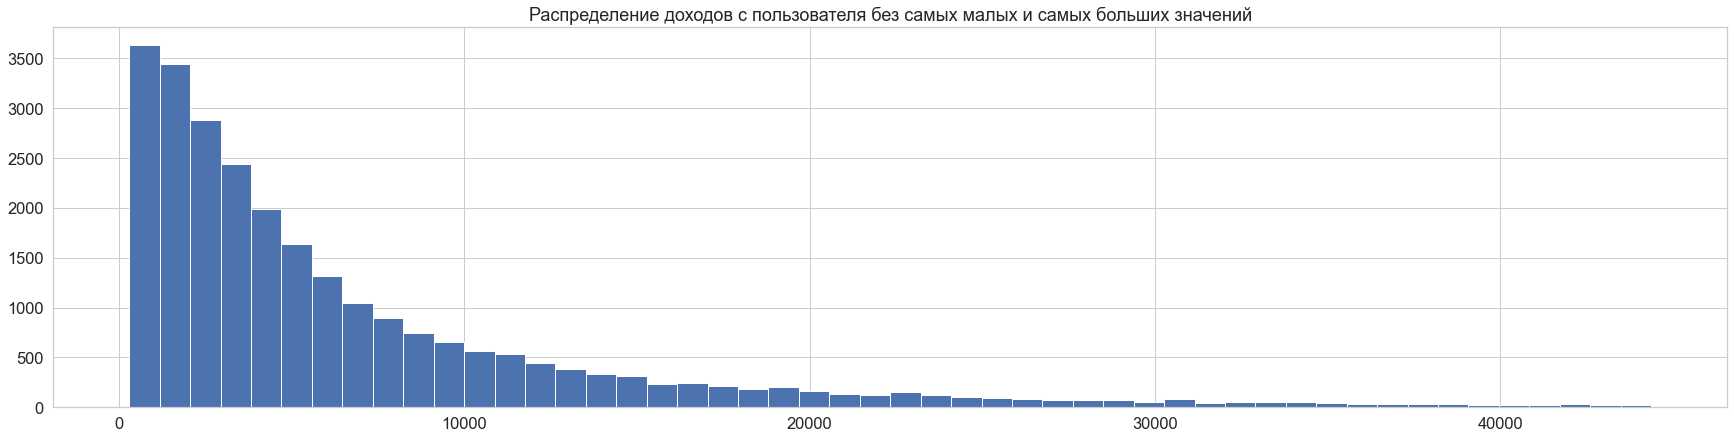

In [25]:
q_0025 = check_items_by_client.revenue_by_client.quantile(0.025)
q_0975 = check_items_by_client.revenue_by_client.quantile(0.975)
check_items_by_client.query('revenue_by_client > @q_0025 & revenue_by_client < @q_0975').revenue_by_client.hist(bins = 50)
plt.title('Распределение доходов с пользователя без самых малых и самых больших значений')
plt.show()

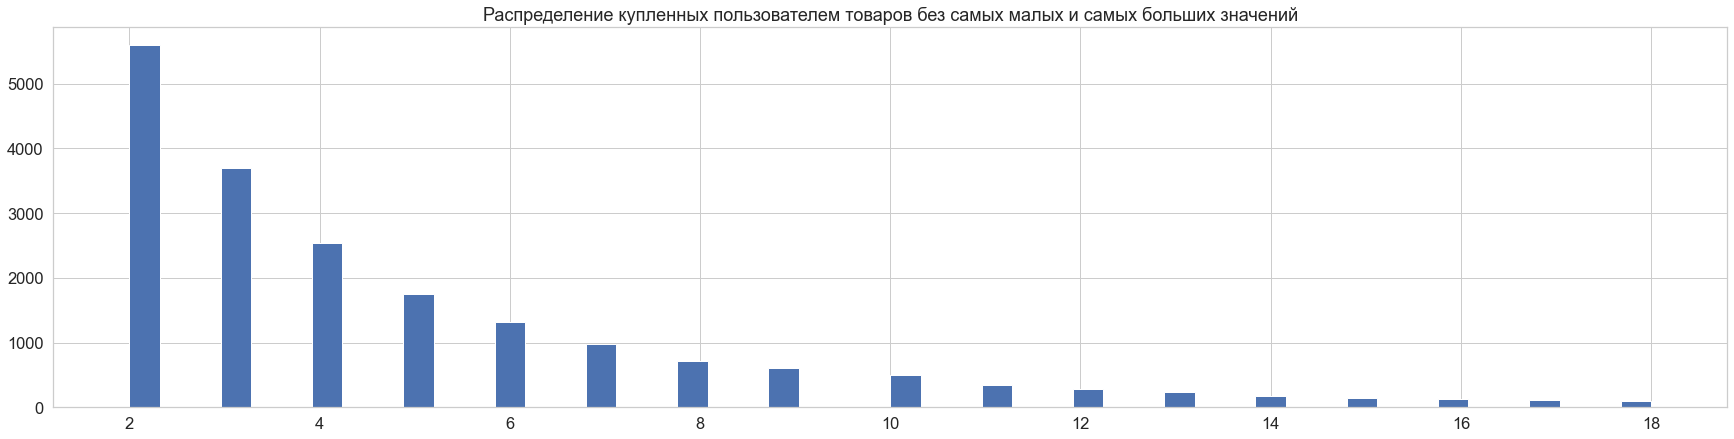

In [26]:
q_0025 = check_items_by_client.amount_by_client.quantile(0.025)
q_0975 = check_items_by_client.amount_by_client.quantile(0.975)
check_items_by_client.query('amount_by_client > @q_0025 & amount_by_client< @q_0975').amount_by_client.hist(bins = 50)
plt.title('Распределение купленных пользователем товаров без самых малых и самых больших значений')
plt.show()

Какой вывод можно сделать здесь?
- Так же, как и в распределениях по айди заказов, здесь есть выбросы расхождение значений средних и медиан. Средний доход с пользователя примерно в 7 раз выше, чем медиана. Среднее значение количества товаров на клиента примерно в полтора раза больше медианы.

#### Товары с нулевой ценой: что это?

Ранее мы обнаружили чеки и товары с нулевой ценой. Что это за товары?

In [27]:
df[df.item_value == 0 ]

,day_of_week,hour_of_day,city_id,item_value,items_amount,order_id,account_id,l1_category_title,l2_category_title,l3_category_title,last_level_category_title,sum_item_value,order_value,order_amount,revenue_by_client,amount_by_client
12045,5,12,689,0,1,6e4f7eda4fa2786cae76e402b547b0e4,49f41cb47e90d53facc0953d367756cd,Хобби и творчество,Рисование,Инструменты и принадлежности,Инструменты и принадлежности,0,3429,5,7818,7
23028,5,22,689,0,1,fd4d017ec39a55d92468e90e00250cf1,aa82a3deff64b2dffeab708c0f67b73c,Товары для дома,Хозяйственные товары,Уход за одеждой и обувью,Ложки для обуви,0,0,1,976,8
26623,0,16,44,0,1,6a04f63f00a0ad2479ba299889cdf842,34ab58ea27791014a4af9ef844e6098c,Электроника,Смартфоны и телефоны,Аксессуары и запчасти,Чехлы,0,0,1,788,2
53786,4,16,689,0,1,55e14ecc941e1d29266d36f6f3ef6aa7,94367b7f9b9ff1515b56f4ef03f56e76,Аксессуары,Женские аксессуары,Аксессуары для волос,Резинки,0,7830,6,7830,6
56039,4,18,44,0,1,4411cf4e8743d91649fa2d58948a2a4f,7bd164d9bdc55f53d55bfe69612d1115,Канцтовары,Товары для школы и обучения,Дневники,Дневники,0,10821,4,10821,4
75936,1,6,44,0,1,c45303d56919f60c53e85392dee94237,955edab9da30fb5ad7e6c45e9c377aa8,Обувь,Женская обувь,Домашняя обувь,Домашняя обувь,0,8235,5,8235,5
89973,1,22,44,0,1,681c452a79e2270d2c030a97ad4e49c1,d663409724e8aaf58857a434fde56e47,Одежда,Женская одежда,Домашняя одежда,Пижамы,0,23947,18,23947,18


Итак, товары принадлежат к разным категориям, выявить какую-то взаимосвязь между этими заказами сложновато. Можно посмотреть полные заказы с этими товарами: что было помимо них?

In [28]:
orders_null = df[df.item_value == 0 ].order_id

In [29]:
df.query('order_id in @orders_null').groupby('order_id').item_value.apply(list)

order_id
4411cf4e8743d91649fa2d58948a2a4f                                  [532, 594, 0, 9695]
55e14ecc941e1d29266d36f6f3ef6aa7                      [641, 2249, 0, 611, 2693, 1636]
681c452a79e2270d2c030a97ad4e49c1    [1255, 4280, 331, 528, 329, 1151, 740, 1419, 5...
6a04f63f00a0ad2479ba299889cdf842                                                  [0]
6e4f7eda4fa2786cae76e402b547b0e4                            [1198, 0, 1764, 194, 273]
c45303d56919f60c53e85392dee94237                           [0, 4112, 770, 2333, 1020]
fd4d017ec39a55d92468e90e00250cf1                                                  [0]
Name: item_value, dtype: object

#### Вывод по товарам с нулевой ценой:

Что же, некоторые из этих товаров находились в заказе с другими товарами, 2 заказа же вообще содержали только товары по нулевой цене. Что это может быть?
- Возможно, есть какая-то ошибка при записи данных
- Бонусная система, позволяющая полностью оплатить покупку. Нулевые товары принадлежат к разным категориям, так что вполне вероятно, что так оно и есть

## Категории: доход и товары

In [30]:
axis_labels = ['l1_category_title', 'sum_item_value_sum', 'sum_item_value_mean', 'items_amount_sum', 'items_amount_mean']
categories_values_amount = df.groupby('l1_category_title') \
    .agg({'sum_item_value': ['sum', 'mean'], 'items_amount': ['sum', 'mean']}) \
    .reset_index().droplevel(level=0, axis=1) \
    .set_axis(axis_labels, axis = 1) 
categories_values_amount

,l1_category_title,sum_item_value_sum,sum_item_value_mean,items_amount_sum,items_amount_mean
0,Автотовары,12300632,2939.219116,4942,1.180884
1,Аксессуары,21449387,2745.697261,8773,1.123016
2,Бытовая техника,7571583,8072.050107,988,1.053305
3,Бытовая химия и личная гигиена,7825245,2262.285343,4194,1.212489
4,"Дача, сад и огород",1422771,2957.943867,631,1.311850
5,Детские товары,13849743,4131.784905,4047,1.207339
6,Здоровье,6177512,3362.826347,2449,1.333152
7,Зоотовары,6135826,2873.923185,2395,1.121780
8,Канцтовары,19301250,2598.095302,10473,1.409746
9,Книги,1833450,2474.291498,947,1.278003


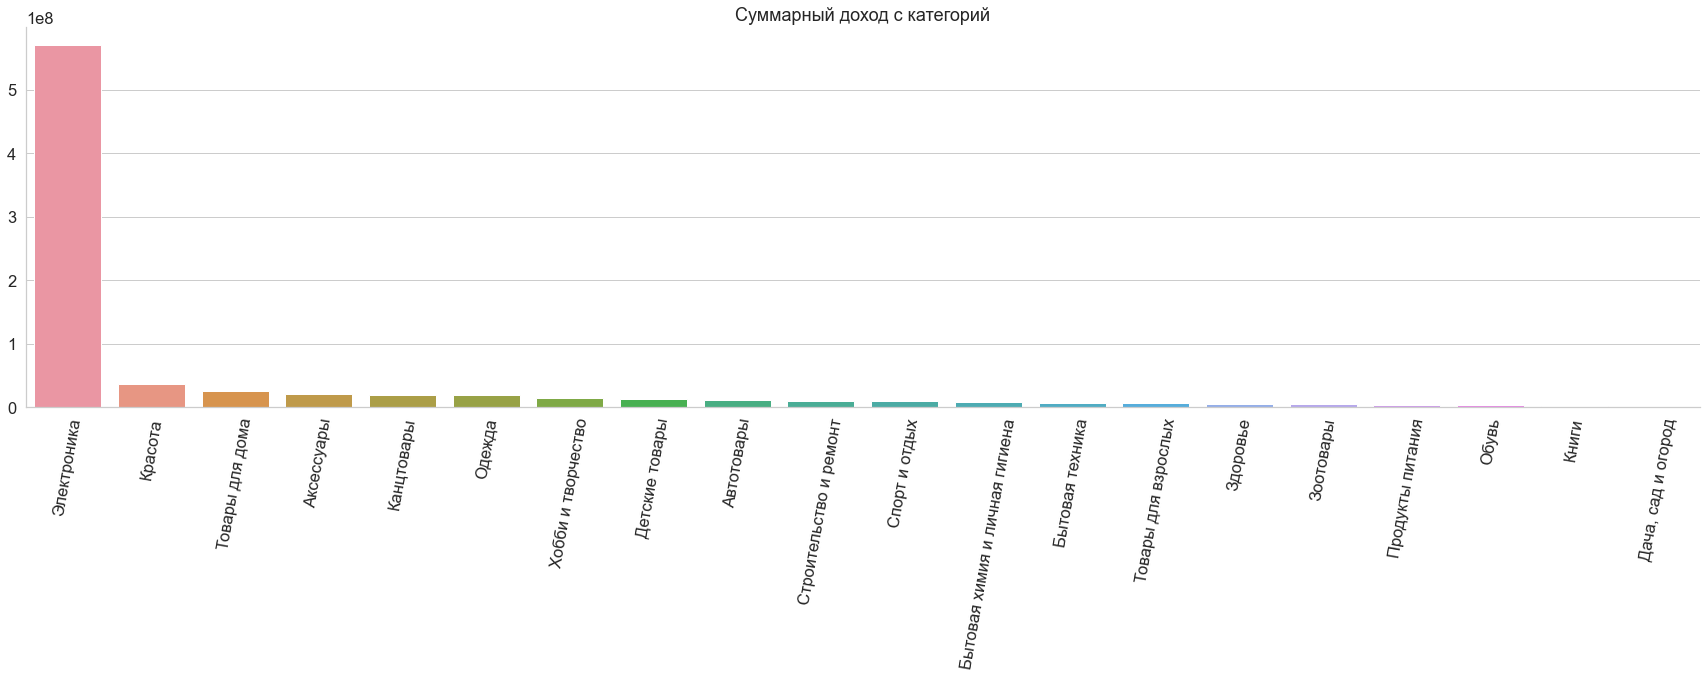

In [31]:
sns.barplot(data = categories_values_amount, x = 'l1_category_title', y = 'sum_item_value_sum', \
            order = categories_values_amount.sort_values('sum_item_value_sum', ascending = False).l1_category_title)
sns.despine()
plt.title('Суммарный доход с категорий')
plt.xticks(rotation = 80)
plt.xlabel('')
plt.ylabel('')
plt.show()

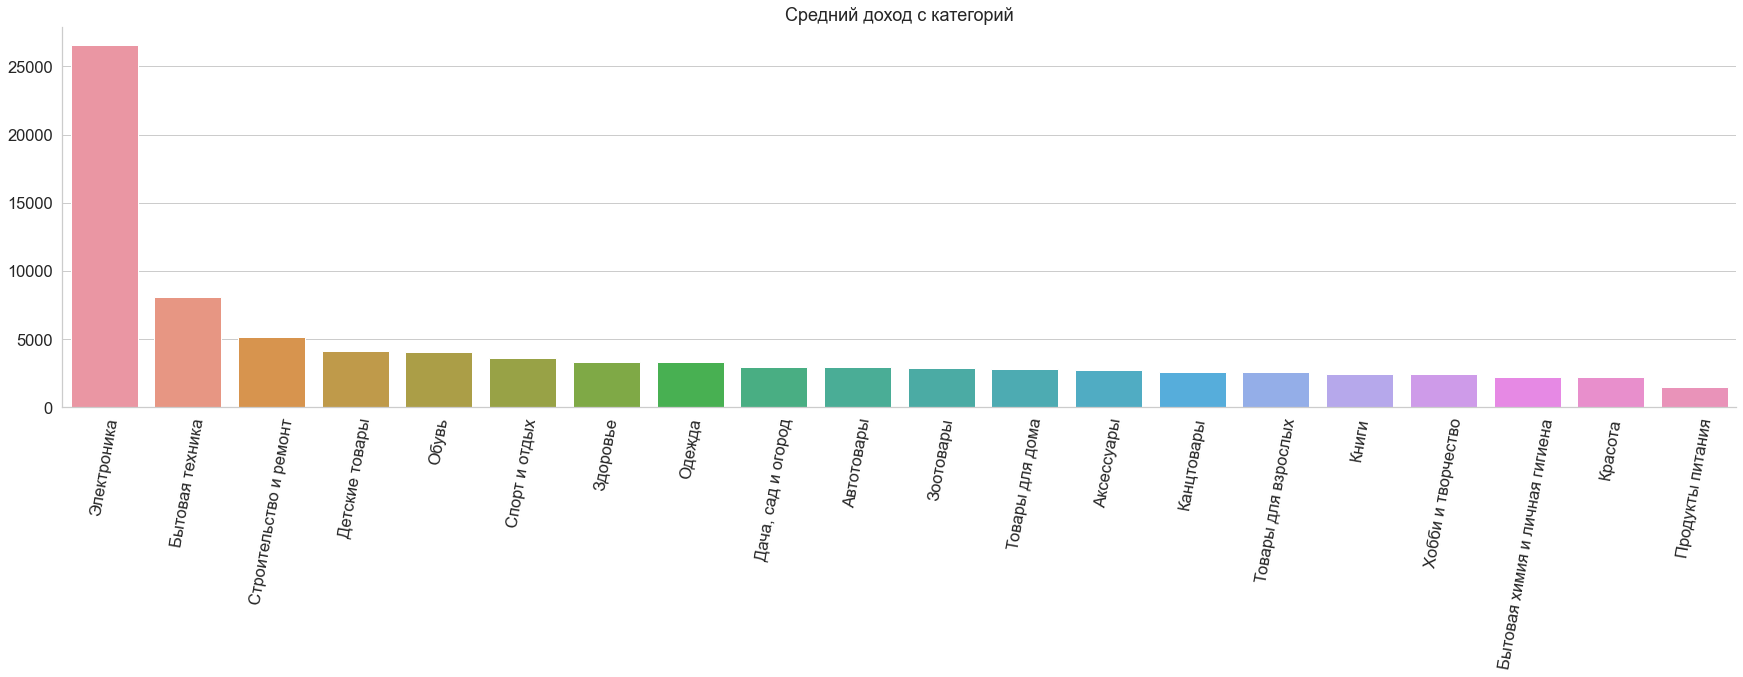

In [32]:
sns.barplot(data = categories_values_amount, x = 'l1_category_title', y = 'sum_item_value_mean', \
            order = categories_values_amount.sort_values('sum_item_value_mean', ascending = False).l1_category_title)
sns.despine()
plt.title('Средний доход с категорий')
plt.xticks(rotation = 80)
plt.xlabel('')
plt.ylabel('')
plt.show()

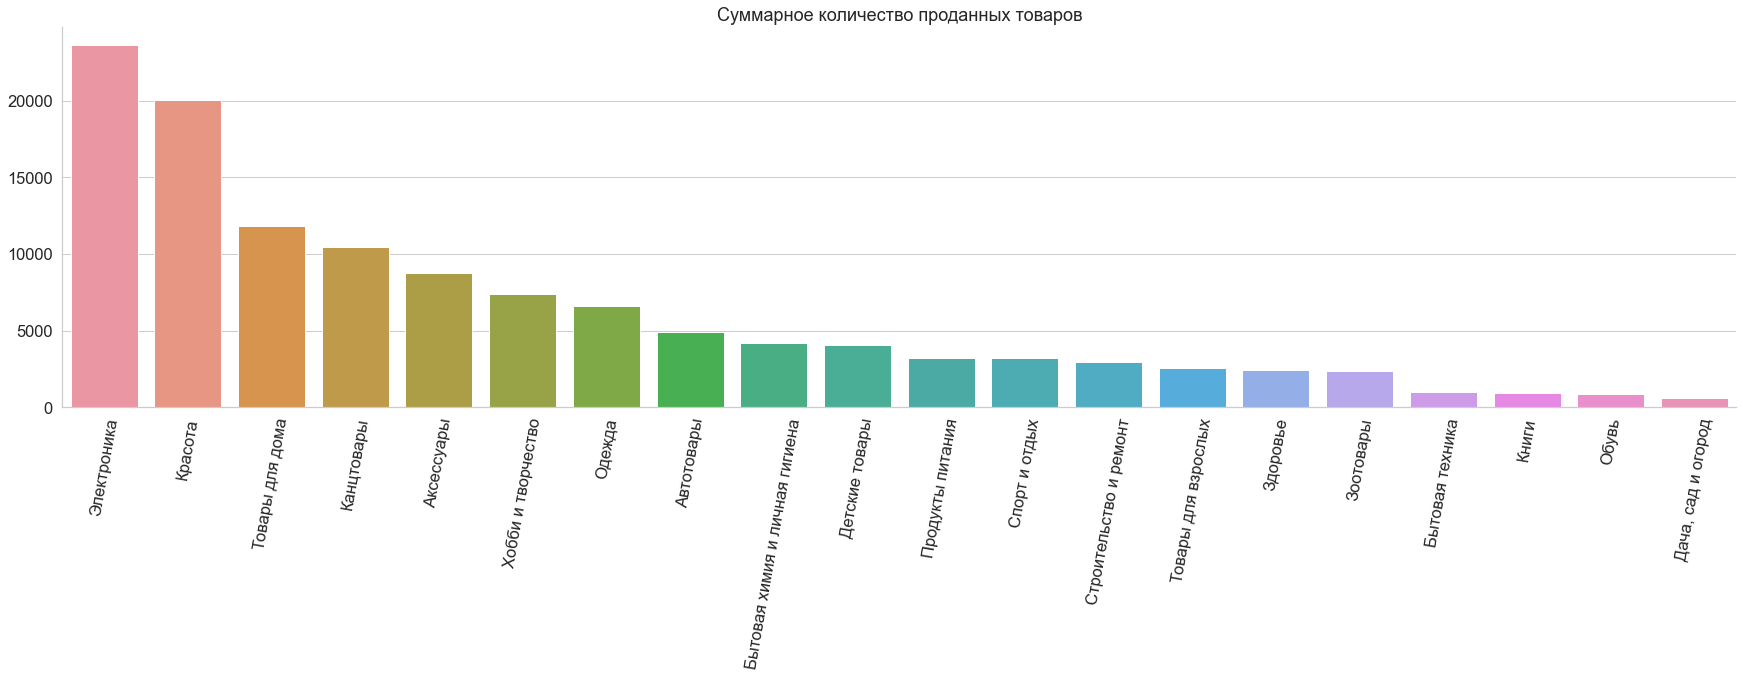

In [33]:
sns.barplot(data = categories_values_amount, x = 'l1_category_title', y = 'items_amount_sum', \
    order = categories_values_amount.sort_values('items_amount_sum', ascending = False).l1_category_title)
sns.despine()
plt.title('Суммарное количество проданных товаров')
plt.xticks(rotation = 80)
plt.xlabel('')
plt.ylabel('')
plt.show()

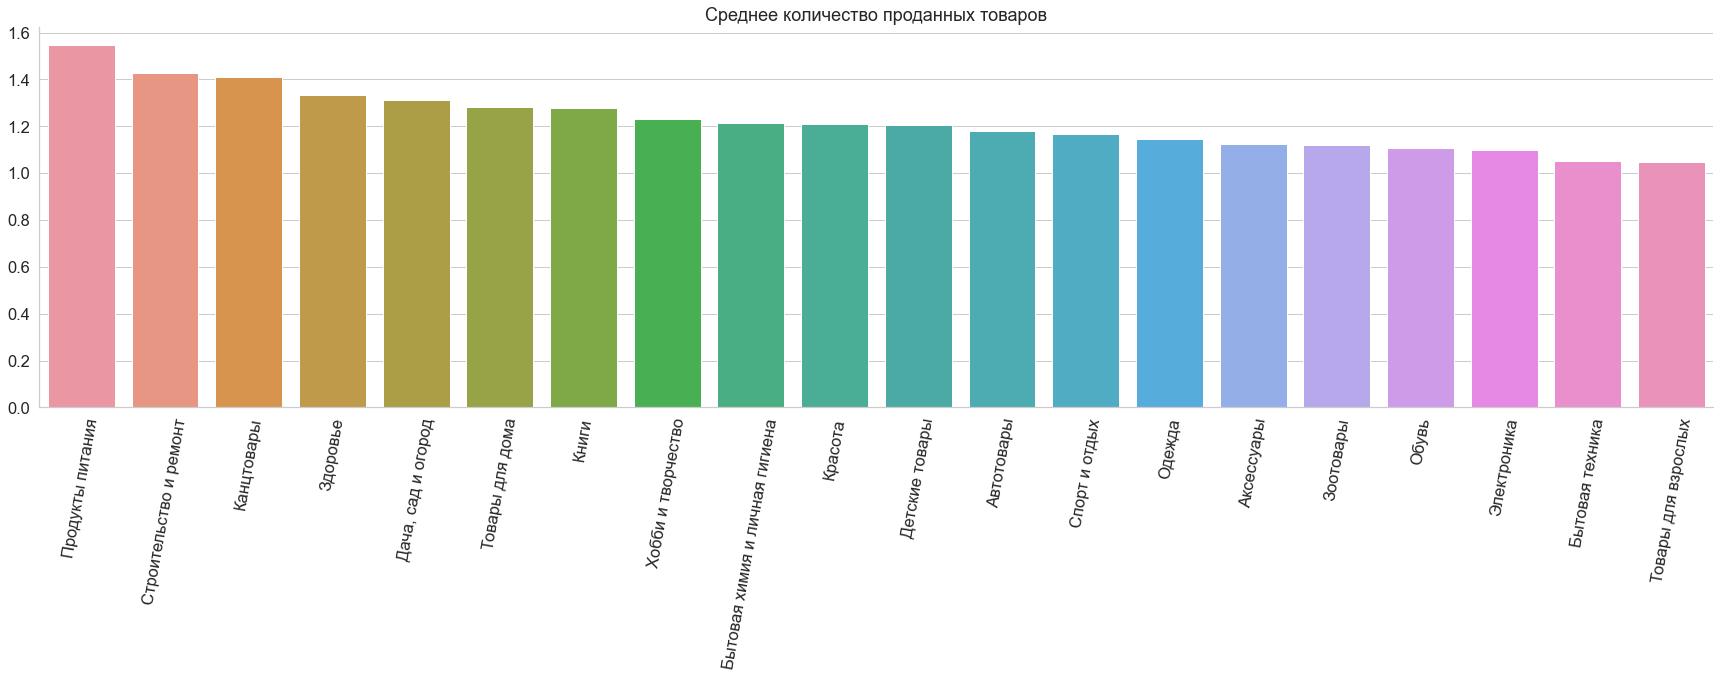

In [34]:
sns.barplot(data = categories_values_amount, x = 'l1_category_title', y = 'items_amount_mean', \
    order = categories_values_amount.sort_values('items_amount_mean', ascending = False).l1_category_title)
sns.despine()
plt.title('Среднее количество проданных товаров')
plt.xticks(rotation = 80)
plt.xlabel('')
plt.ylabel('')
plt.show()

## Вывод по категориям: доход и товары
Большую часть дохода приносит категория "электроника", остальные категории значительно отстают. Средний доход с категорий сохраняет ту же тенденцию.

Тем не менее, само количество проданных товаров распределено не так резко! Здесь также лидер электроника, на втором месте красота, на третьем - товары для дома. Зато среднее количество проданных товаров имеет другое распределение: здесь первые места занимают продукты питания, строительство и канцтовары, а элетроника, бытовая техника, товары для взрослых находятся в конце. Это можно объяснить просто: чем дешевле товар, тем больше его единиц покупают, тогда как электронику и бытовую технику берут в небольшом количестве.

## Города: заказы, категории, клиенты

#### Города: сумма заказов, AOV, MOV

In [35]:
axis_labels = ['city_id', 'total_order_value', 'AOV', 'MOV']

city_order_values = df.drop_duplicates('order_id') \
    .groupby('city_id', as_index = False).agg({'order_value' : ['sum', 'mean', 'median']}).droplevel(level=0, axis=1) \
    .set_axis(axis_labels, axis = 1) 
city_order_values

,city_id,total_order_value,AOV,MOV
0,44,309546561,18119.091606,3052.5
1,689,488856347,24442.817350,2862.5


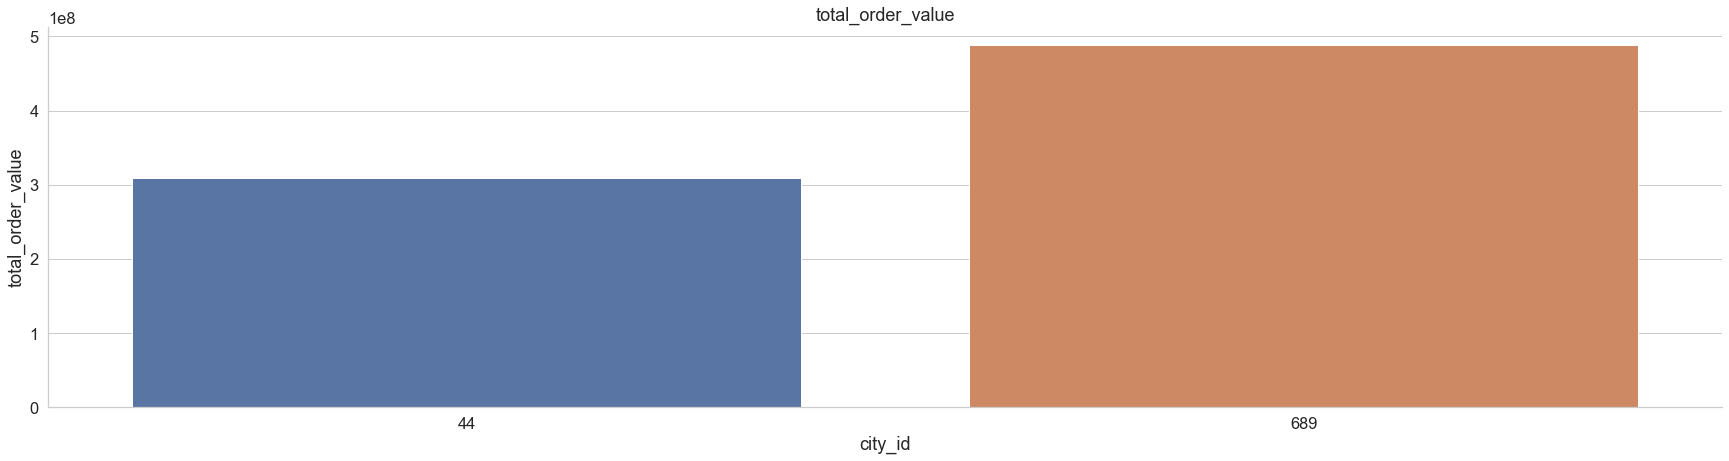

In [36]:
sns.barplot(data = city_order_values, x = 'city_id', y = 'total_order_value')
sns.despine()
plt.title('total_order_value')
plt.show()

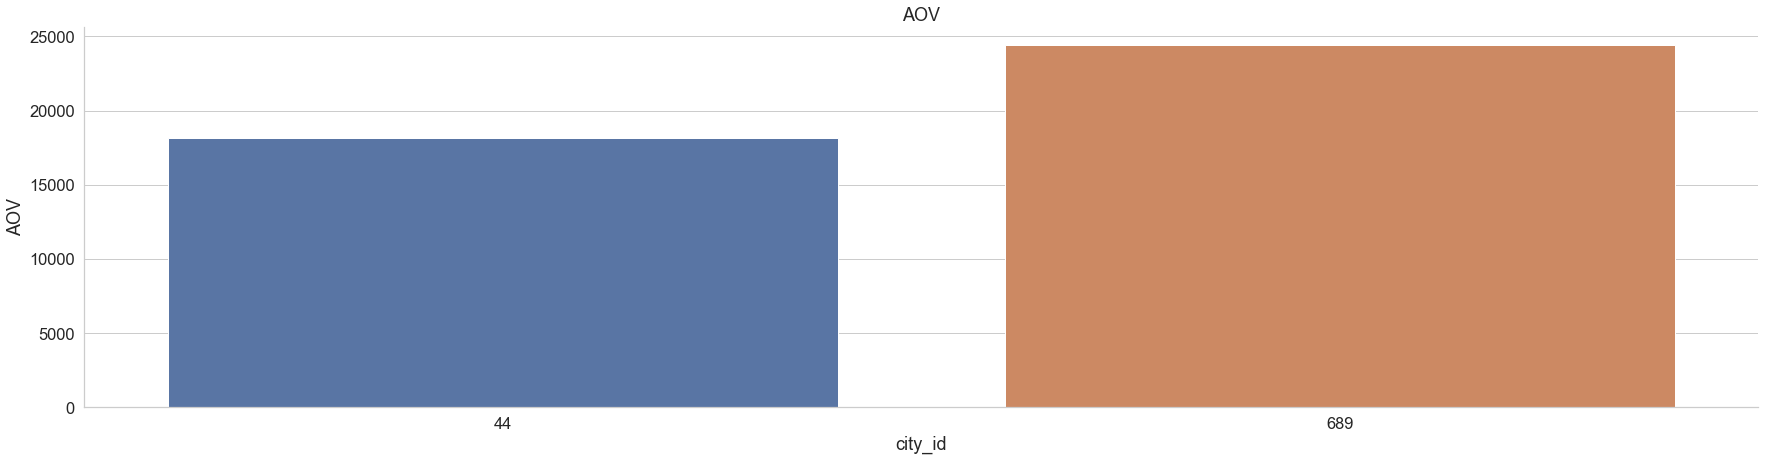

In [37]:
sns.barplot(data = city_order_values, x = 'city_id', y = 'AOV')
sns.despine()
plt.title('AOV')
plt.show()

Следует посмотреть, различаются ли статистически значимо AOV для двух городов!

- H0: AOV в городах статистически значимо не различаются
- H1: AOV в городах статистически значимо различаются

#### t-test на полных выборках

Изначально я решила провести ttest c поправкой Уэлча для полных выборок, так как посчитала, что выбросы в этом случае органичные и не нарушают какой-то закономерности.

Так как ttest Уэлча работает и с гомогенной, и негомогенной дисперсией, тест Левена на гомогенность я не провожу.
Нормальность определяю визуально в силу больших ограничений Шапиро-Уилка.

In [38]:
sample_city44_order_value = df.query('city_id == 44').drop_duplicates('order_id').order_value
sample_city689_order_value = df.query('city_id == 689').drop_duplicates('order_id').order_value

<AxesSubplot:>

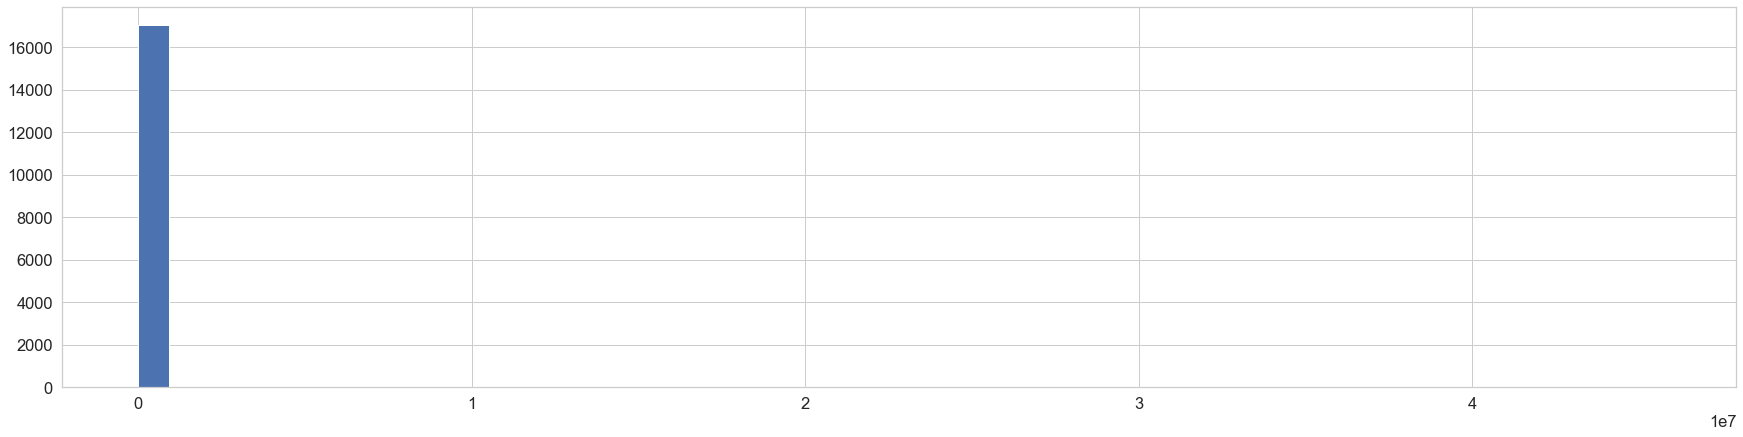

In [39]:
sample_city44_order_value.hist(bins = 50)

<AxesSubplot:>

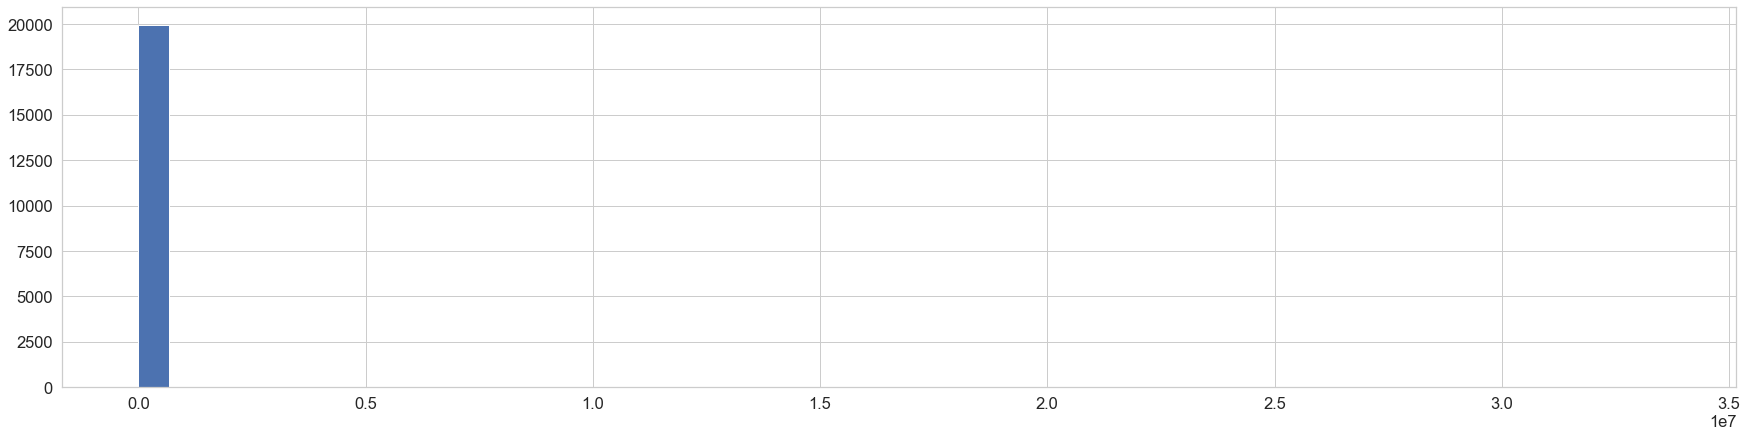

In [40]:
sample_city689_order_value.hist(bins = 50)

In [41]:
stats.ttest_ind(sample_city44_order_value, sample_city689_order_value, equal_var = False)

Ttest_indResult(statistic=-1.169340979189135, pvalue=0.24227383171309738)

#### Вывод по ttest на полных выборках
p = 0.24, принимаем нулевую гипотезу, с учётом выбросов результат не является стат значимым, AOV стат значимо не различаются

Но при таких значениях средней это показалось мне странным, я решила провести то же самое, но для усеченного среднего

#### t-test без выбросов

In [42]:
q_0025 = sample_city44_order_value.quantile(0.025)
q_0975 = sample_city44_order_value.quantile(0.975)

sample_city44_order_value = sample_city44_order_value \
    .loc[(sample_city44_order_value> q_0025) & (sample_city44_order_value < q_0975)]

<AxesSubplot:>

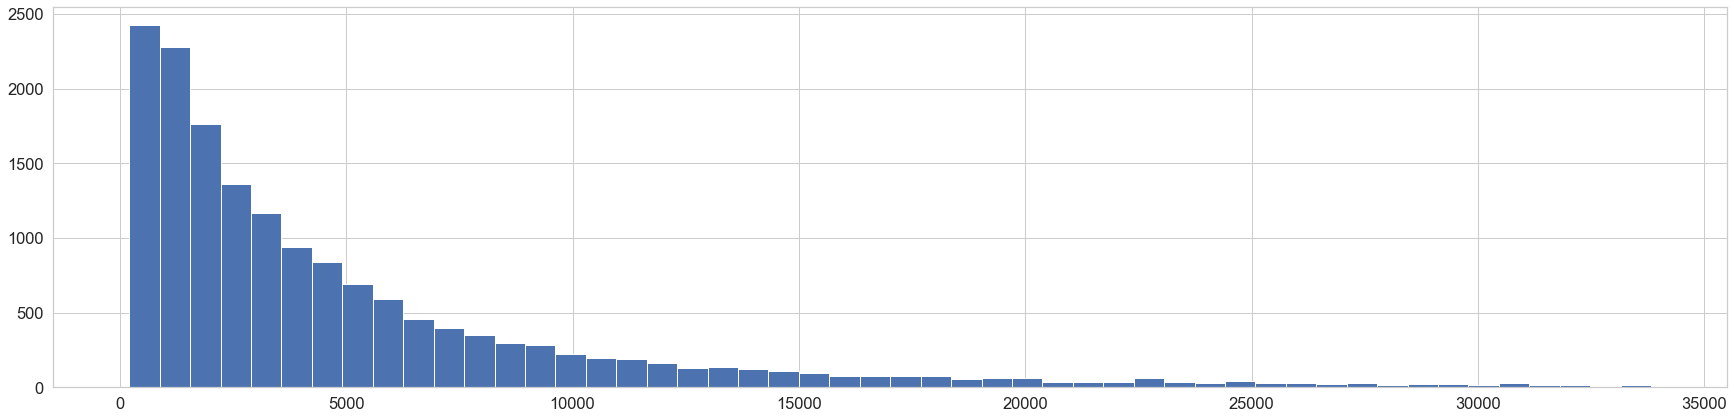

In [43]:
sample_city44_order_value.hist(bins = 50)

In [44]:
q_0025 = sample_city689_order_value.quantile(0.025)
q_0975 = sample_city689_order_value.quantile(0.975)

sample_city689_order_value = sample_city689_order_value \
    .loc[(sample_city689_order_value> q_0025) & (sample_city689_order_value < q_0975)]

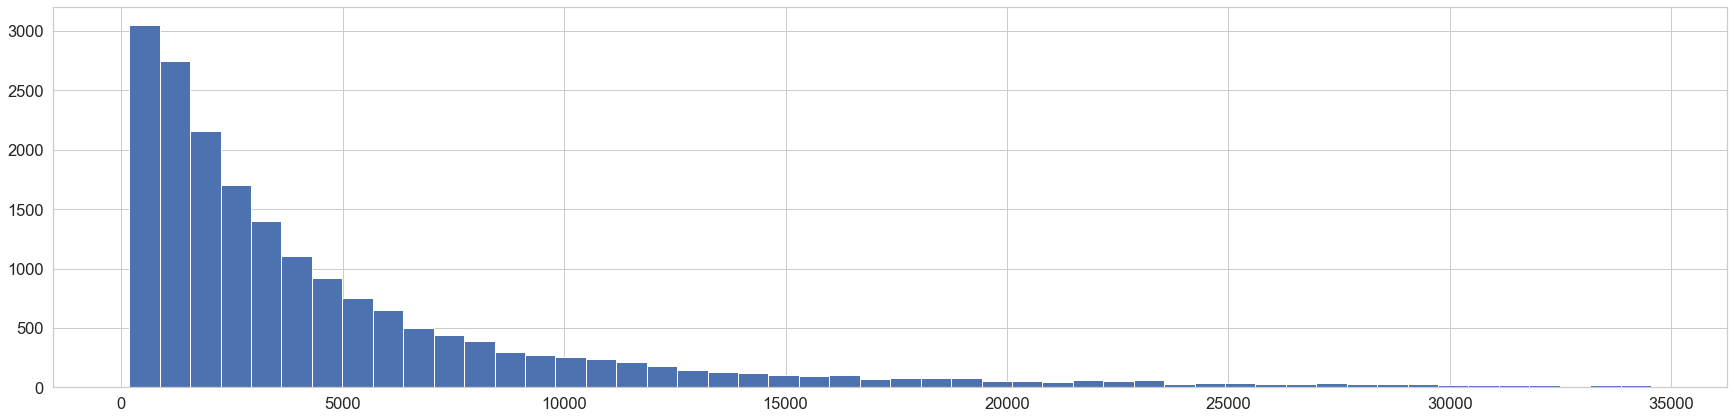

In [45]:
(sample_city689_order_value).hist(bins = 50)
plt.show()

In [ ]:
print('AOV без выбросов для 44 города ',  sample_city44_order_value.mean())
print('AOV без выбросов для 689 города ',  sample_city689_order_value.mean())

Как и ожидалось, распределение стало просто экспоненциальным. 

t-test:

In [46]:
stats.ttest_ind(sample_city44_order_value, sample_city689_order_value, equal_var = False)

Ttest_indResult(statistic=2.8157067127578927, pvalue=0.004869779195695652)

#### Вывод по t-test без выбросов

p = 0.004, отклоняем нулевую гипотезу, усечённые AOV в городах различаются.

#### Бутстрап медианы суммы заказа (MOV)
Учитывая происходящее выше, стало интересно посмотреть на медиану суммы заказа(MOV). Судя по всему, медианы будут статистически значимо различаться по городам. Проверяю:

- H0: MOV в городах статистически значимо не различаются
- H1: MOV в городах статистически значимо различаются

In [47]:
sample_city44_order_value = np.array(df.query('city_id == 44').drop_duplicates('order_id').order_value)
sample_city689_order_value = np.array(df.query('city_id == 689').drop_duplicates('order_id').order_value)


print(bs.bootstrap_ab(sample_city44_order_value, sample_city689_order_value, bs_stats.median, bs_compare.difference))

190.0    (99.0, 279.0)


#### Вывод по бустрапу MOV
0 не входит в интервал, отклоняем нулевую гипотезу, MOV городов статистически значимо различаются

### Вывод по заказам по городам

- Суммарно доход с города 689 выше, чем доход с города 44. 
- AOV по полным выборкам, включающим выбросы, статистически значимо не различается. - Welch ttest
- AOV по выборкам без выбросов(усечённое среднее), статистически значимо выше в городе 44.  - Welch ttest
- MOV(медиана суммы заказа) по полным выборкам статистически значимо выше у города 44. - Bootstrap

### Города: клиенты, ARPU, DAU

#### Уникальные клиенты

In [48]:
crosstab_id_city = df.groupby('city_id').agg({'account_id' : 'nunique'})

In [49]:
crosstab_id_city

,account_id
city_id,
44,12541
689,15024


Вряд ли такое распределение частот будет статистически значимо различным, но проверим это с помощью хи-квадрат
- H0: Статистически значимой взаимосвязи между количеством клиентов и городом нет
- H1: Статистически значимая взаимосвязь между количеством клиентов и городом есть

In [50]:
g, p, dof, expctd = stats.chi2_contingency(crosstab_id_city)
print(p)

1.0


#### Вывод по хи-квадрат для клиентов и городов:
Отклоняем нулевую гипотезу, статистически значимой взаимосвязи между количеством клиентов и городом нет, p = 1

#### ARPU

Для начала разделю исходный дф на дф по городам:

In [51]:
df_city_44 = df.drop_duplicates('account_id').query('city_id == 44')

In [52]:
df_city_689 = df.drop_duplicates('account_id').query('city_id == 689')

In [53]:
print('ARPU city 44 = ', df_city_44.revenue_by_client.mean())
print('ARPU city 689 = ', df_city_689.revenue_by_client.mean())

ARPU city 44 =  24686.028630672303
ARPU city 689 =  32538.924054845582


Посмотрю распределения revenue_by_client для обоих городов: вероятно, будет то же самое, что и для сумм заказов: экспоненциальное распределение с выбросами

In [54]:
df_city_44.revenue_by_client.describe().round(1)

count       12539.0
mean        24686.0
std       1060390.6
min             1.0
25%          1896.0
50%          4310.0
75%          9302.5
max      86612623.0
Name: revenue_by_client, dtype: float64

In [55]:
df_city_689.revenue_by_client.describe().round(1)

count        15024.0
mean         32538.9
std        1334146.0
min              3.0
25%           1777.0
50%           3951.0
75%           8762.5
max      124217597.0
Name: revenue_by_client, dtype: float64

<AxesSubplot:xlabel='revenue_by_client', ylabel='Count'>

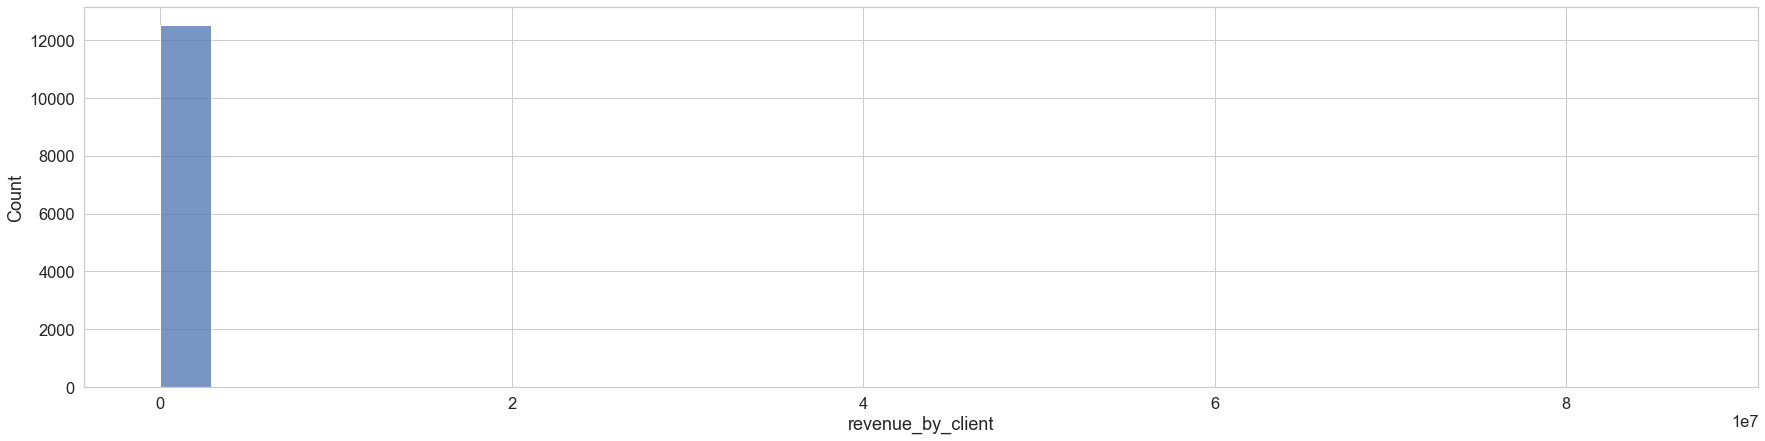

In [56]:
sns.histplot(df_city_44.revenue_by_client, bins = 30)

<AxesSubplot:xlabel='revenue_by_client', ylabel='Count'>

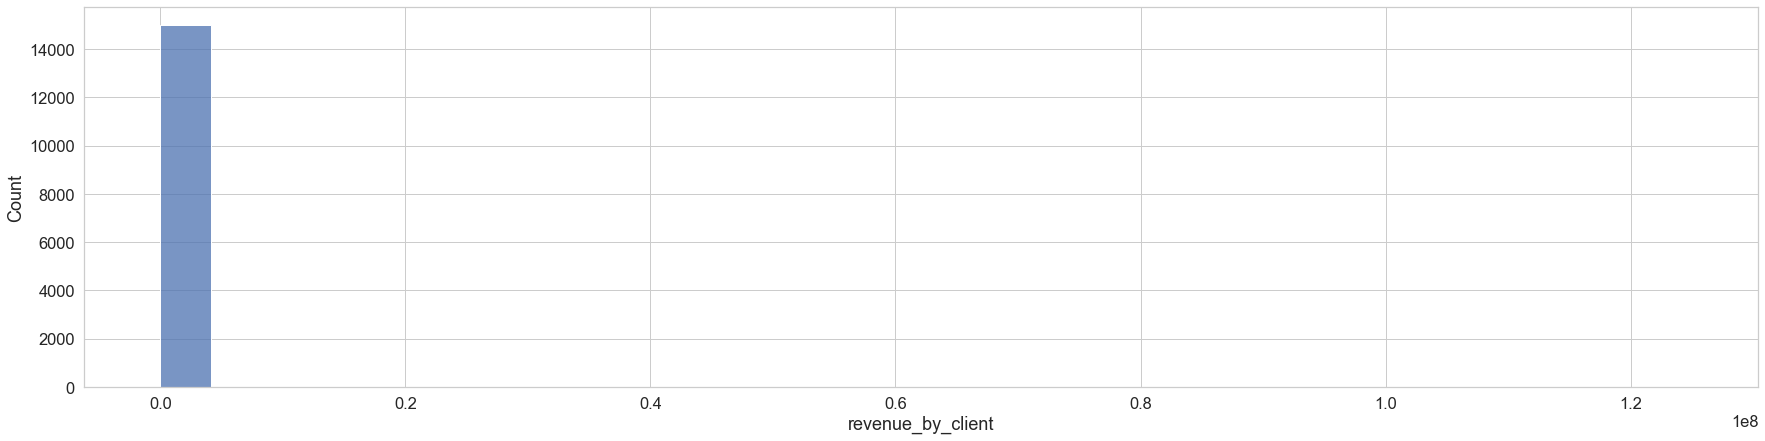

In [57]:
sns.histplot(df_city_689.revenue_by_client, bins = 30)

Далее я проведу аналогичные тесты, как и в случае оценки AOV по городам

- H0: ARPU в городах статистически значимо не различаются
- H1: ARPU в городах статистически значимо различаются

#### t-test на полных выборках

Изначально я решила провести ttest c поправкой Уэлча для полных выборок, так как посчитала, что выбросы в этом случае органичные и не нарушают какой-то закономерности.

Так как ttest Уэлча работает и с гомогенной, и негомогенной дисперсией, тест Левена на гомогенность я не провожу.
Нормальность определяю визуально в силу больших ограничений Шапиро-Уилка.

In [123]:
sample_city44_revenue_by_client = df_city_44.revenue_by_client
sample_city689_revenue_by_client = df_city_689.revenue_by_client

In [114]:
stats.ttest_ind(sample_city44_revenue_by_client, sample_city689_revenue_by_client, equal_var = False)

Ttest_indResult(statistic=-0.5443067785851262, pvalue=0.5862347967913182)

#### Вывод по ttest на полных выборках
p = 0.58, принимаем нулевую гипотезу, с учётом выбросов результат не является стат значимым, ARPU стат значимо не различаются

Но при таких значениях ARPU это показалось мне странным, я решила провести то же самое, но для усеченного среднего

#### t-test без выбросов

In [124]:
q_0025 = sample_city44_revenue_by_client.quantile(0.025)
q_0975 = sample_city44_revenue_by_client.quantile(0.975)

sample_city44_revenue_by_client = sample_city44_revenue_by_client \
    .loc[(sample_city44_revenue_by_client> q_0025) & (sample_city44_revenue_by_client < q_0975)]

q_0025 = sample_city689_revenue_by_client.quantile(0.025)
q_0975 = sample_city689_revenue_by_client.quantile(0.975)

sample_city689_revenue_by_client = sample_city689_revenue_by_client \
    .loc[(sample_city689_revenue_by_client> q_0025) & (sample_city689_revenue_by_client < q_0975)]

In [125]:
print('ARPU без выбросов для 44 города ',  sample_city44_revenue_by_client.mean())
print('ARPU без выбросов для 689 города ',  sample_city689_revenue_by_client.mean())

ARPU без выбросов для 44 города  6968.500797582067
ARPU без выбросов для 689 города  6585.982902389461


In [116]:
stats.ttest_ind(sample_city44_revenue_by_client, sample_city689_revenue_by_client, equal_var = False)

Ttest_indResult(statistic=4.1471352375133055, pvalue=3.377708625832254e-05)

#### Вывод по ttest без выбросов
p < 0.001, отклоянем нулевую гипотезу, после избавления от выбросов ARPU статистически значимо различаются

#### Бутстрап медианы суммы заказа (MRPU)
Учитывая происходящее выше, стало интересно посмотреть на медиану дохода с клиента(MRPU). Судя по всему, медианы будут статистически значимо различаться по городам. Проверяю:

- H0: MRPU в городах статистически значимо не различаются
- H1: MRPU в городах статистически значимо различаются

In [120]:
sample_city44_revenue_by_client = np.array(df_city_44.revenue_by_client)
sample_city689_revenue_by_client = np.array(df_city_689.revenue_by_client)


print(bs.bootstrap_ab(sample_city44_revenue_by_client, sample_city689_revenue_by_client, bs_stats.median, bs_compare.difference))

359.0    (226.98750000000018, 506.0125)


#### Вывод по бутстрап медианы суммы заказа (MRPU)
0 не входит в интервал, отклоняем нулевую гипотезу, MRPU в выборках статистически значимо различаются

#### DAU

In [153]:
DAU_44 = df_city_44.groupby('day_of_week', as_index = False).agg({'account_id' : 'nunique'})
DAU_44

,day_of_week,account_id
0,0,1662
1,1,1987
2,3,1997
3,4,2209
4,5,2234
5,6,2450


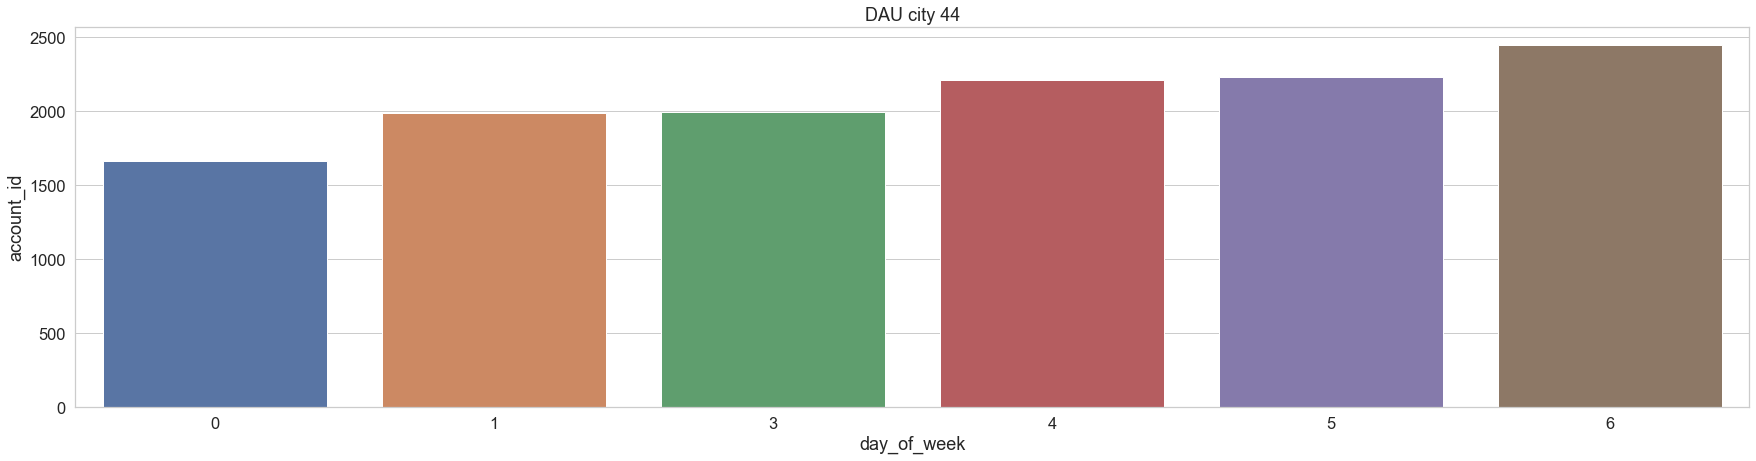

In [156]:
sns.barplot(data = DAU_44, x = 'day_of_week', y = 'account_id')
plt.title('DAU city 44')
plt.show()

In [157]:
DAU_689 = df_city_689.groupby('day_of_week', as_index = False).agg({'account_id' : 'nunique'})
DAU_689

,day_of_week,account_id
0,0,2081
1,1,2442
2,3,2507
3,4,2694
4,5,2491
5,6,2809


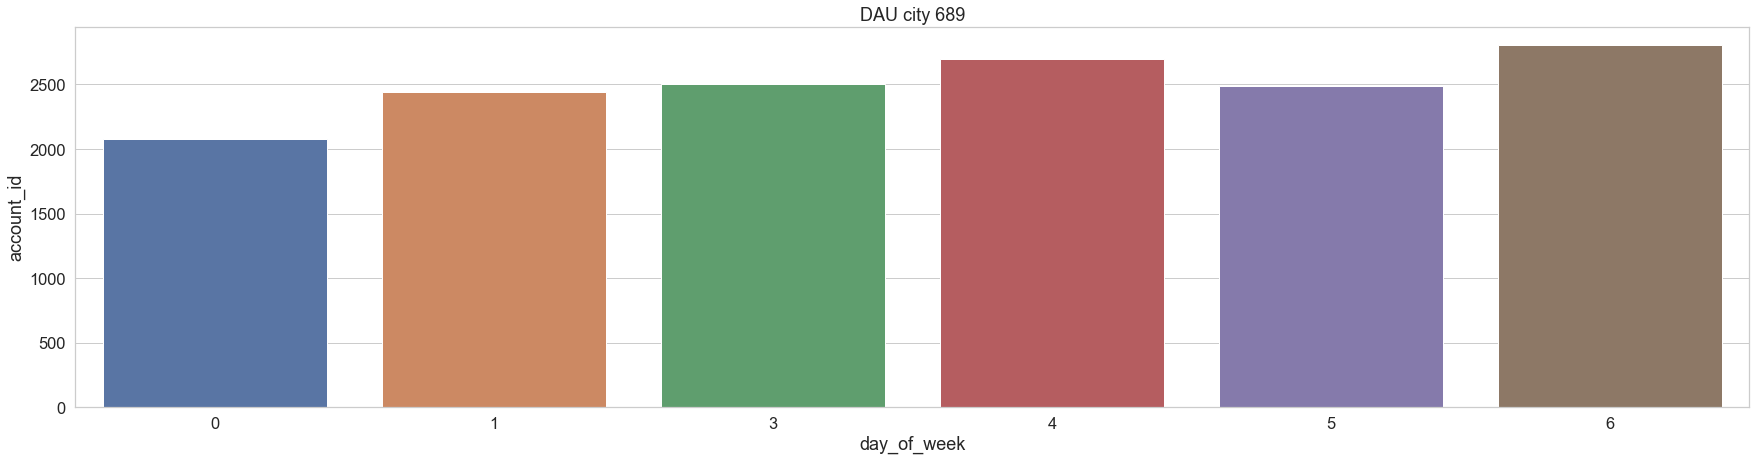

In [158]:
sns.barplot(data = DAU_689, x = 'day_of_week', y = 'account_id')
plt.title('DAU city 689')
plt.show()

#### Вывод по DAU и городам
DAU за каждый день выше у города 689. Для города 44 DAU последовательно растёт по городам, DAU для города 689 растёт с 1 по 4 день, падает на уровень третьего в пятый день, и достигает максимума в 6 день

### Вывод по клиентам и городам

- Клиентов в городе 689 больше, чем в 44, но не статистически значимо. - Хи квадрат 
- ARPU по полным выборкам, включающим выбросы, статистически значимо не различается. - Welch ttest
- ARPU по выборкам без выбросов(усечённое среднее), статистически значимо выше в городе 44.  - Welch ttest
- MRPU(медиана дохода с пользователя) по полным выборкам статистически значимо выше у города 44. - Bootstrap
- DAU за каждый день выше у города 689. Для города 44 DAU последовательно растёт по городам, DAU для города 689 растёт с 1 по 4 день, падает на уровень третьего в пятый день, и достигает максимума в 6 день

### Города и категории

In [64]:
axis_labels = [
    'l1_category_title', 'city_id', 'sum_item_value_sum', 'sum_item_value_mean',
    'items_amount_sum', 'items_amount_mean' ]

categories_values_amount = df.groupby(['l1_category_title','city_id']) \
    .agg({'sum_item_value': ['sum', 'mean'], 'items_amount': ['sum', 'mean']}) \
    .reset_index().droplevel(level=0, axis=1) \
    .set_axis(axis_labels, axis = 1) 
categories_values_amount

,l1_category_title,city_id,sum_item_value_sum,sum_item_value_mean,items_amount_sum,items_amount_mean
0,Автотовары,44,5188396,2705.107404,2235,1.165276
1,Автотовары,689,7112236,3137.289810,2707,1.194089
2,Аксессуары,44,9151219,2551.929448,3969,1.106804
3,Аксессуары,689,12298168,2910.120208,4804,1.136772
4,Бытовая техника,44,3492107,8064.912240,455,1.050808
5,Бытовая техника,689,4079476,8078.170297,533,1.055446
6,Бытовая химия и личная гигиена,44,3411290,2062.448609,1962,1.186215
7,Бытовая химия и личная гигиена,689,4413955,2445.404432,2232,1.236565
8,"Дача, сад и огород",44,867093,3373.902724,350,1.361868
9,"Дача, сад и огород",689,555678,2480.705357,281,1.254464


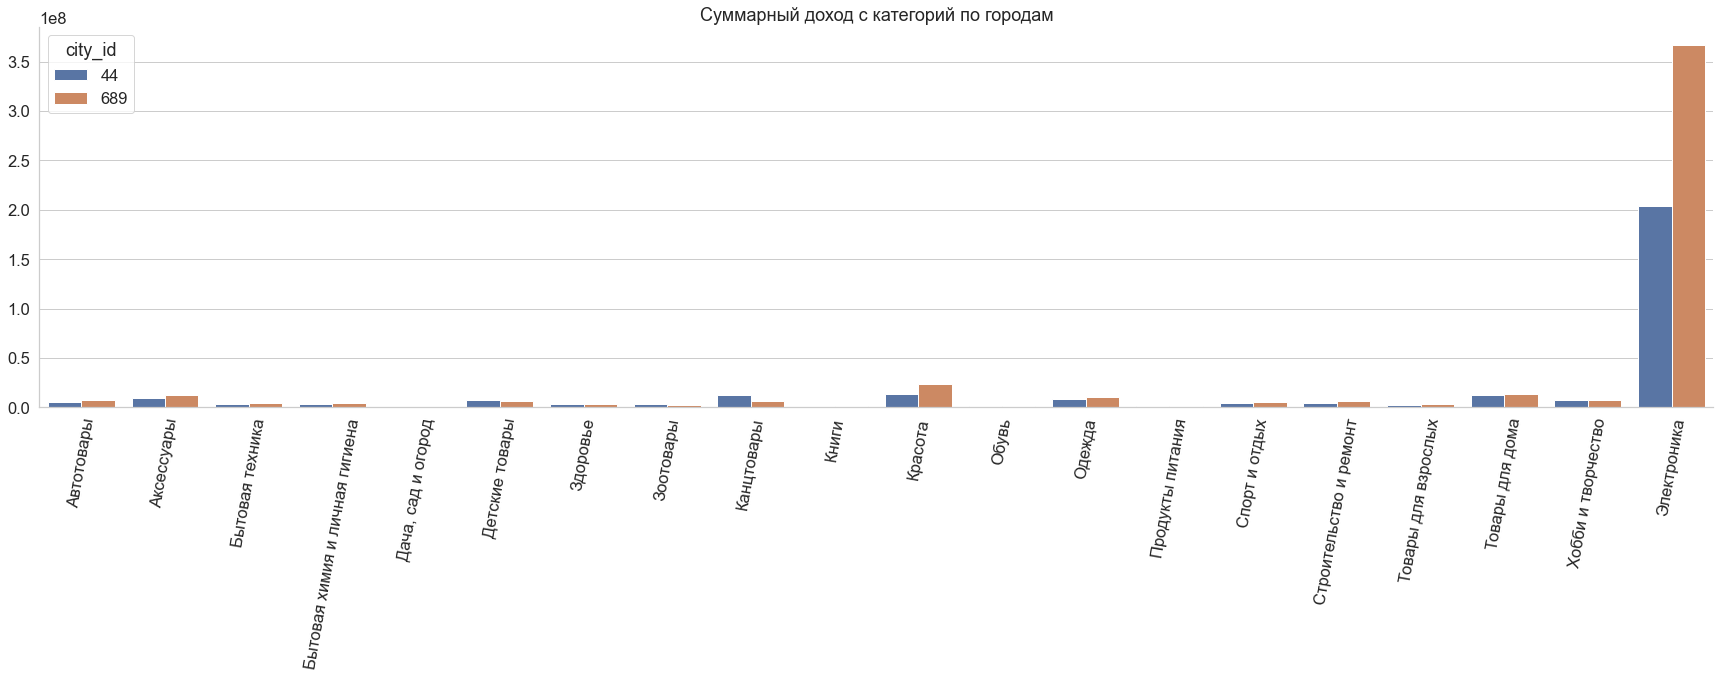

In [65]:
sns.barplot(data = categories_values_amount, x = 'l1_category_title', y = 'sum_item_value_sum', hue = 'city_id')
sns.despine()
plt.title('Суммарный доход с категорий по городам')
plt.xticks(rotation = 80)
plt.xlabel('')
plt.ylabel('')
plt.show()

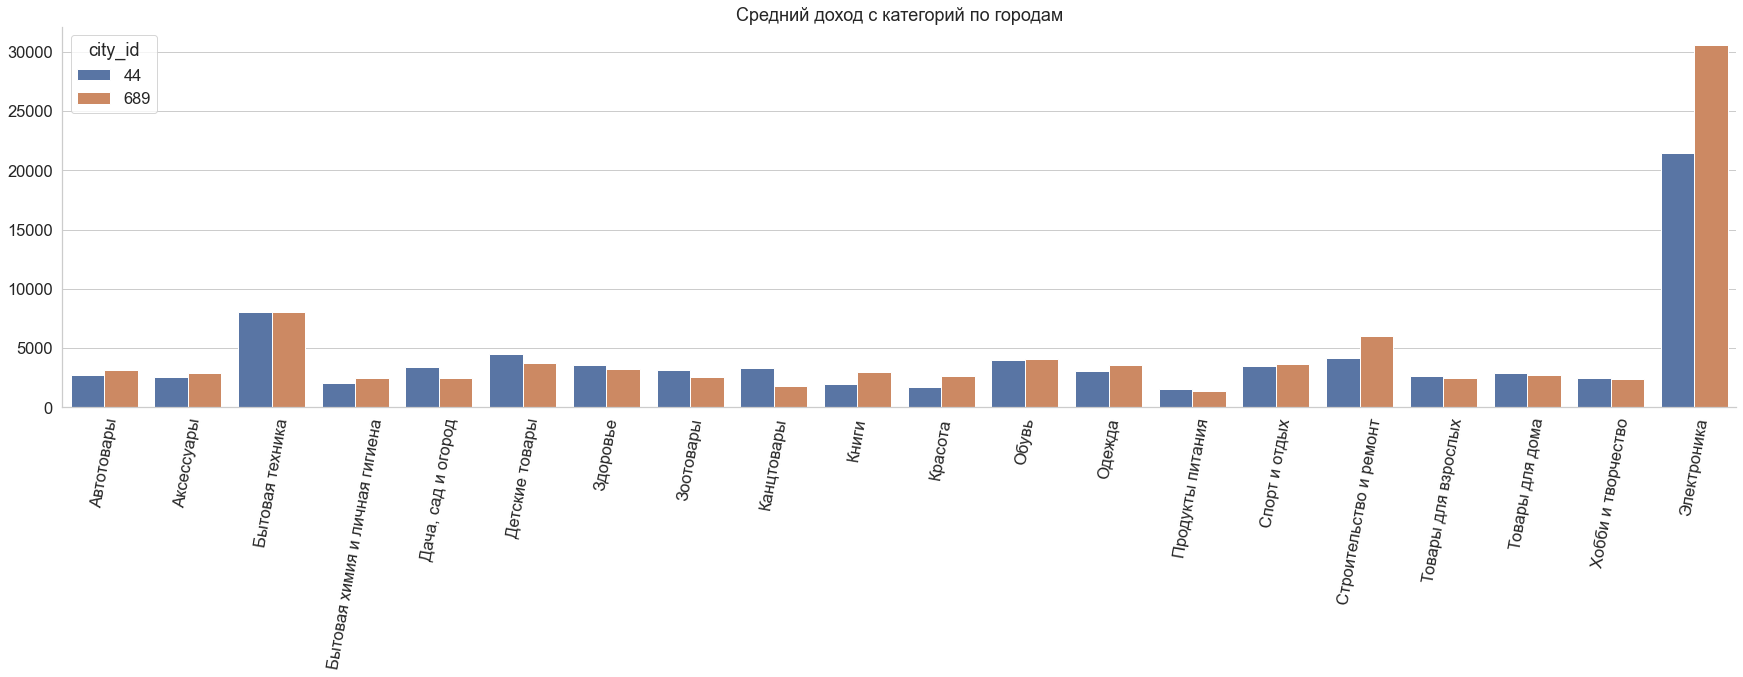

In [66]:
sns.barplot(data = categories_values_amount, x = 'l1_category_title', y = 'sum_item_value_mean', hue = 'city_id')
sns.despine()
plt.title('Средний доход с категорий по городам')
plt.xticks(rotation = 80)
plt.xlabel('')
plt.ylabel('')
plt.show()

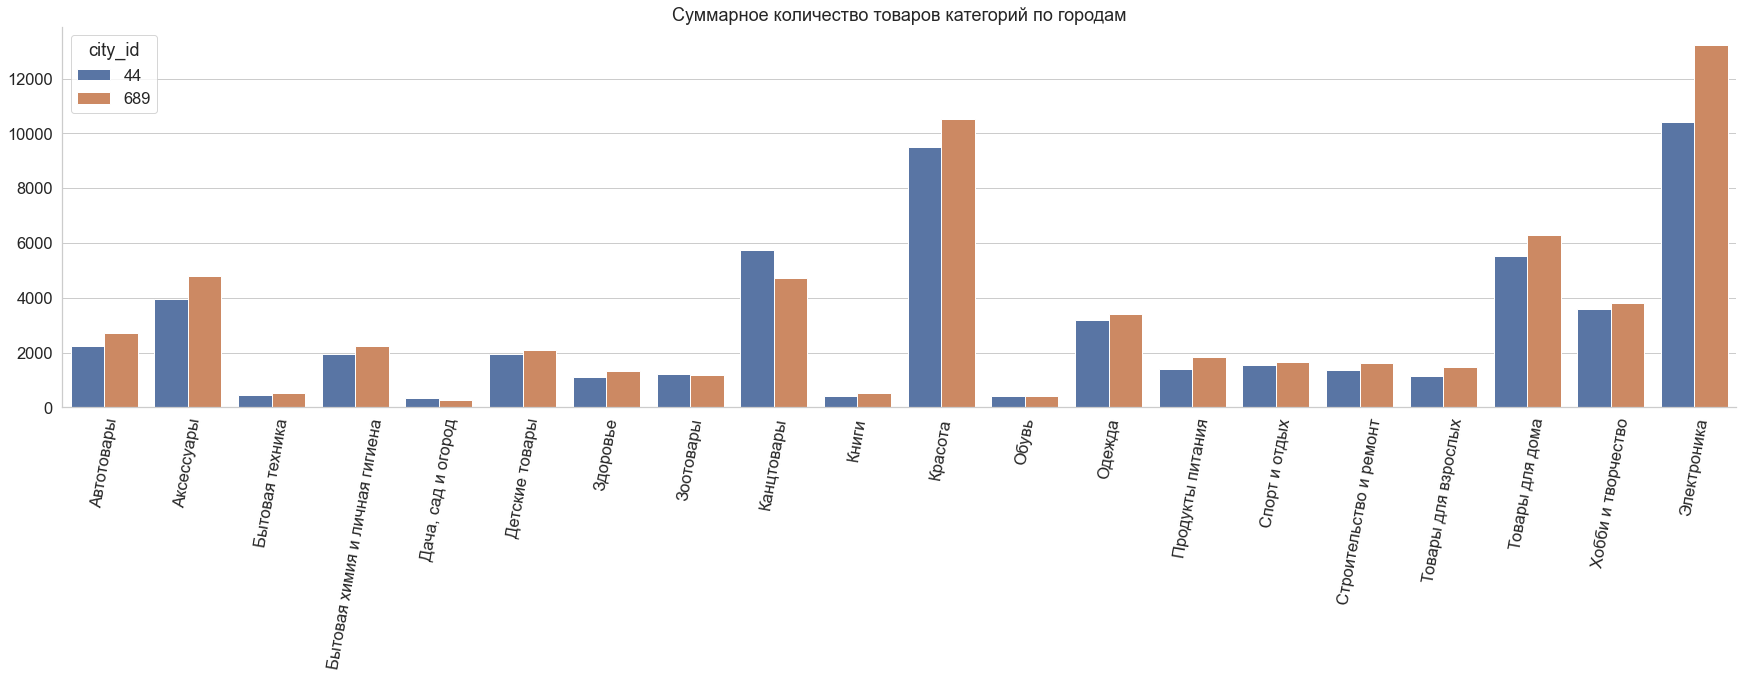

In [67]:
sns.barplot(data = categories_values_amount, x = 'l1_category_title', y = 'items_amount_sum', hue = 'city_id')
sns.despine()
plt.title('Суммарное количество товаров категорий по городам')
plt.xticks(rotation = 80)
plt.xlabel('')
plt.ylabel('')
plt.show()

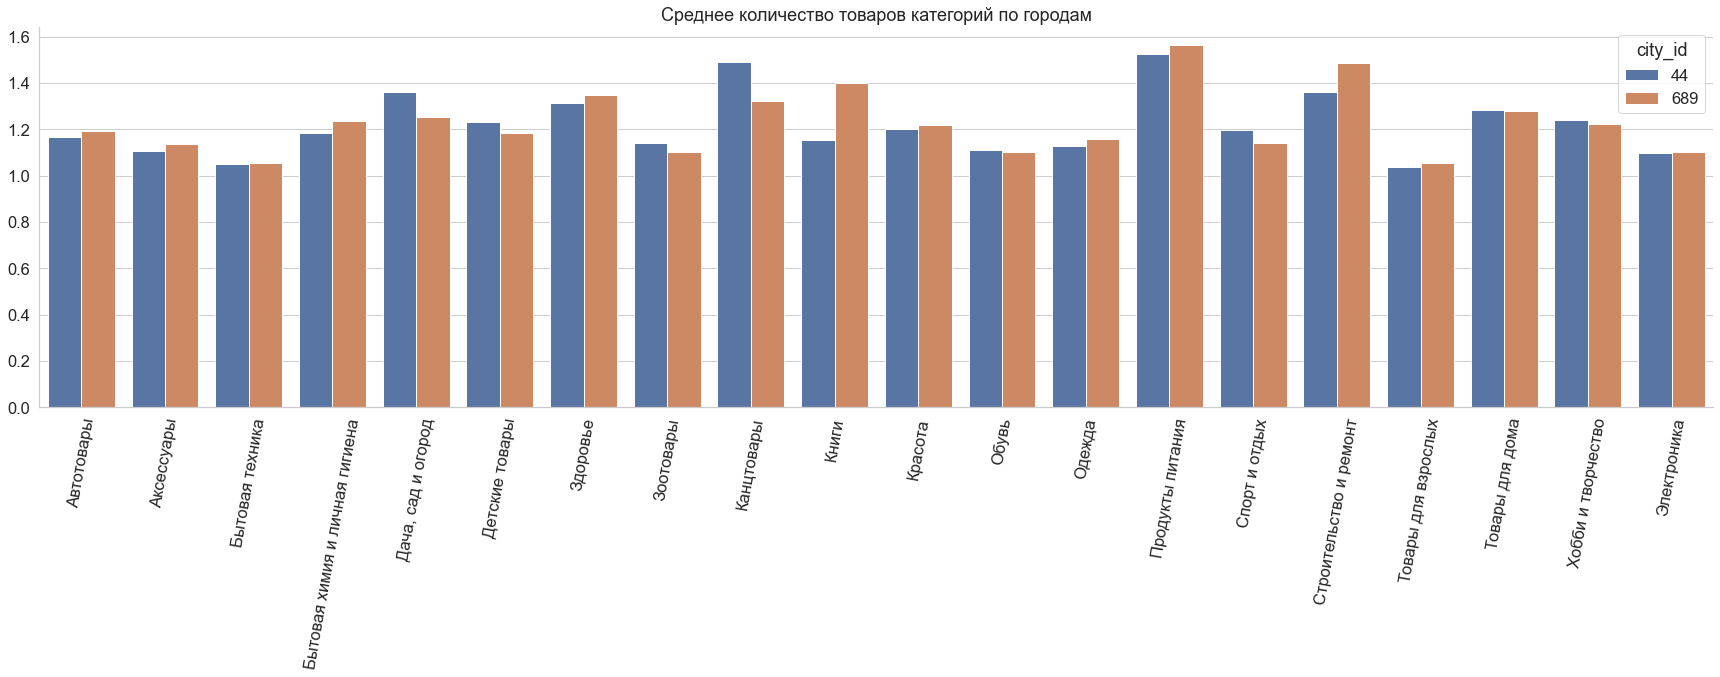

In [68]:
sns.barplot(data = categories_values_amount, x = 'l1_category_title', y = 'items_amount_mean', hue = 'city_id')
sns.despine()
plt.title('Среднее количество товаров категорий по городам')
plt.xticks(rotation = 80)
plt.xlabel('')
plt.ylabel('')
plt.show()

### Вывод по категориям и городам
Большая часть дохода для обоих городов приходится на категорию электроники, для города 689 этот доход выше, для среднего дохода соотношение сохраняется. 

Больше всего было продано товаров из категории электроники, красоты, товаров для дома, во всех трёх категориях было больше продано в городе 689. По среднему количеству проданных товаров лидируют продукты питания, строительство и ремонт, канцтовары. Для первых двух категорий среднее значение выше для города 689, для канцтоваров город 44

## Дни: DAU, заказы, количество вещей в заказе

In [69]:
axis_labels = [
    'day_of_week', 'DAU', 'unq_orders', 'total_order_value',
    'AOV', 'MOV', 'total_order_amount', 'mean_order_amount' ]

day_of_week_metrics = df.groupby('day_of_week', as_index = False) \
    .agg({'account_id': 'nunique', 'order_id': 'nunique', 
          'order_value' : ['sum', 'mean', 'median'], 'order_amount' : ['sum', 'mean']}) \
    .droplevel(level=0, axis=1) \
    .set_axis(axis_labels, axis = 1) 
day_of_week_metrics 

,day_of_week,DAU,unq_orders,total_order_value,AOV,MOV,total_order_amount,mean_order_amount
0,0,5324,6042,612102159,38689.220593,5077,107182,6.774667
1,1,5621,6325,379618662,21827.199977,5474,128229,7.372873
2,3,5541,6277,280651304,16295.146258,5348,124450,7.225803
3,4,5670,6476,483155202,26868.824491,5358,140024,7.786898
4,5,5165,5873,414647112,25098.184856,5513,133988,8.110163
5,6,5259,6091,294780321,17739.683517,5368,122899,7.395980


### DAU, число заказов

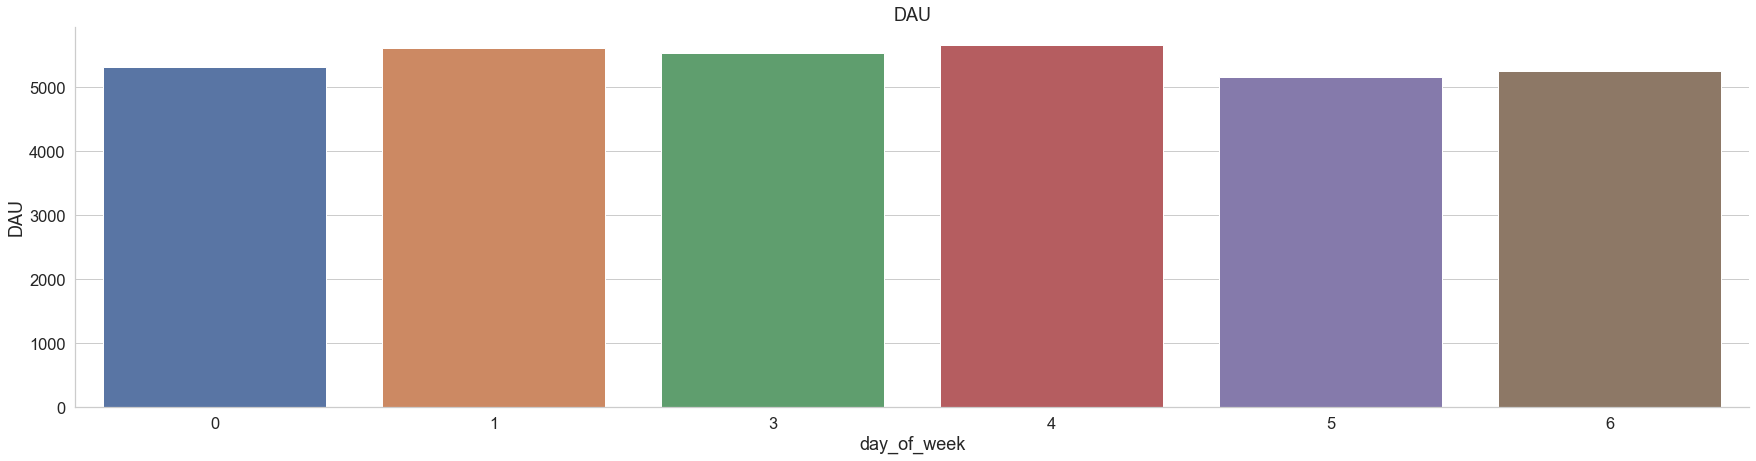

In [70]:
sns.barplot(data = day_of_week_metrics, x = 'day_of_week', y = 'DAU')
sns.despine()
plt.title('DAU')
plt.show()

Вряд ли такое распределение частот будет статистически значимо различным, но проверим это с помощью хи-квадрат
- H0: Статистически значимой взаимосвязи между DAU и днём нет
- H1: Статистически значимая взаимосвязь между DAU и днём есть

In [71]:
crosstab = day_of_week_metrics[['day_of_week', 'DAU']].set_index('day_of_week')
g, p, dof, expctd = stats.chi2_contingency(crosstab_id_city)
print(p)

1.0


Принимаем нулевую гипотезу, статистически значимой взаимосвязи между DAU и днём нет, p=1

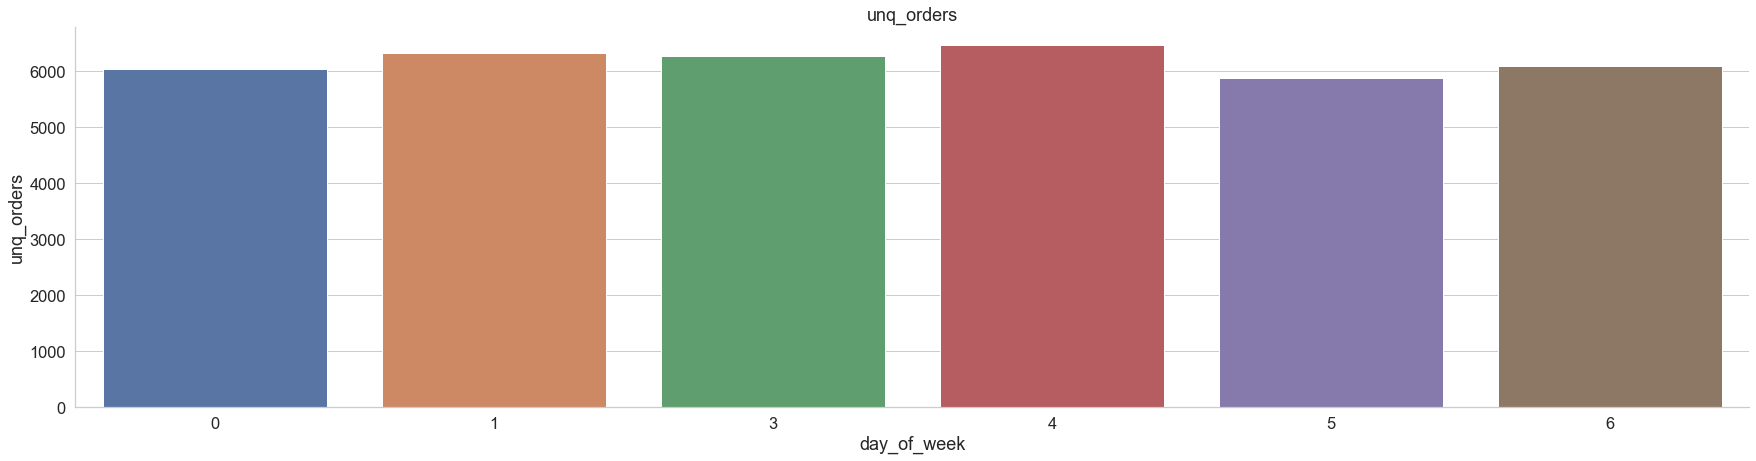

In [72]:
sns.barplot(data = day_of_week_metrics, x = 'day_of_week', y = 'unq_orders')
sns.despine()
plt.title('unq_orders')
plt.show()

#### Вывод по DAU и числу заказов:
- DAU выглядит равномерным, больше всего клиентов было в 4 день, меньше всего в 5 день. 
- Статистически значимой взаимосвязи между DAU и днём нет. - Хи-квадрат
- Распределение заказов по дням повторяет DAU: выглядит равномерным, больше всего клиентов было в 4 день, меньше всего в 5 день.

### Дни: Сумма заказов, AOV, MOV

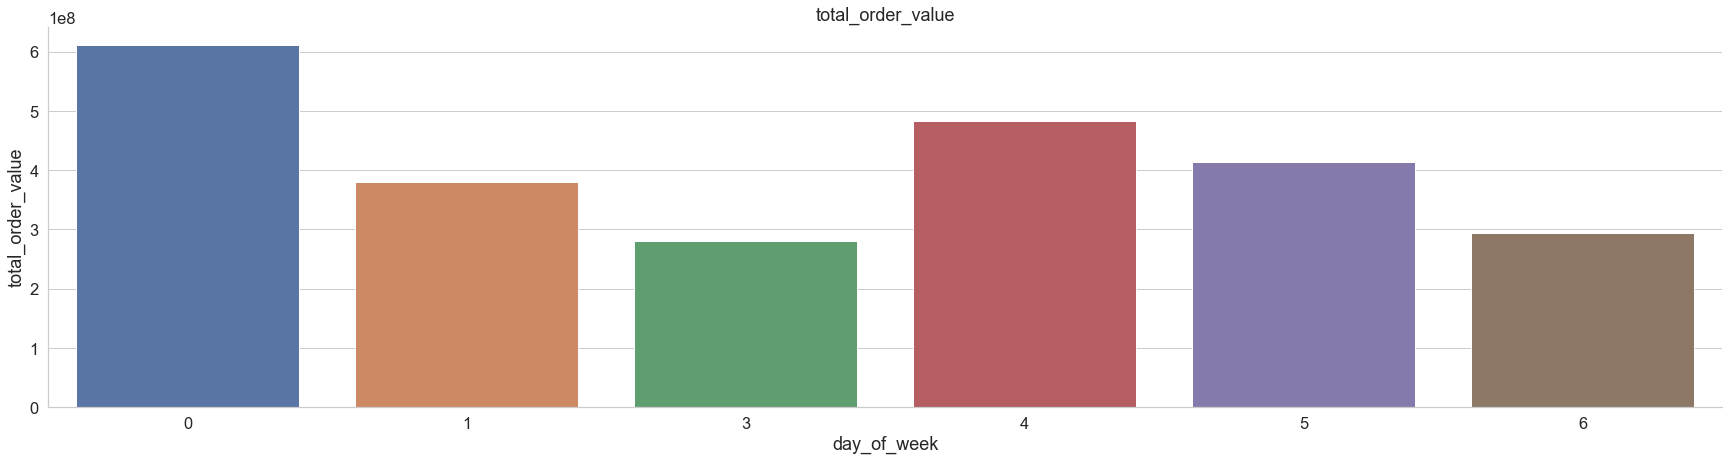

In [73]:
sns.barplot(data = day_of_week_metrics, x = 'day_of_week', y = 'total_order_value')
sns.despine()
plt.title('total_order_value')
plt.show()

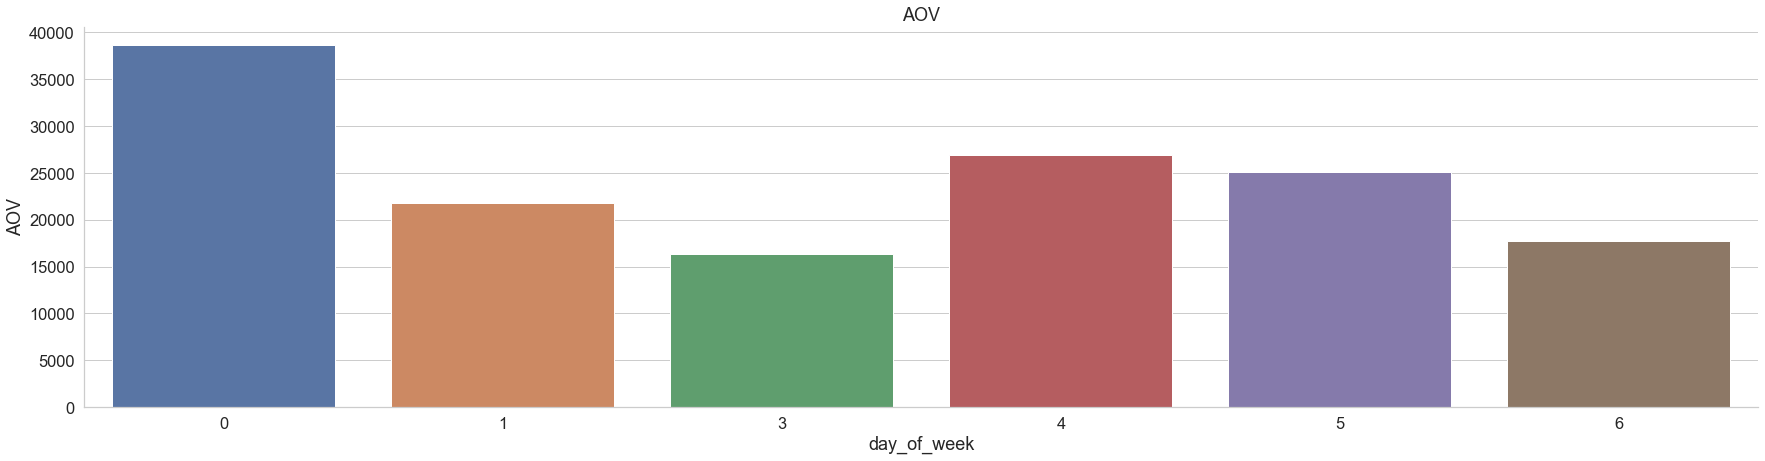

In [74]:
sns.barplot(data = day_of_week_metrics, x = 'day_of_week', y = 'AOV')
sns.despine()
plt.title('AOV')
plt.show()

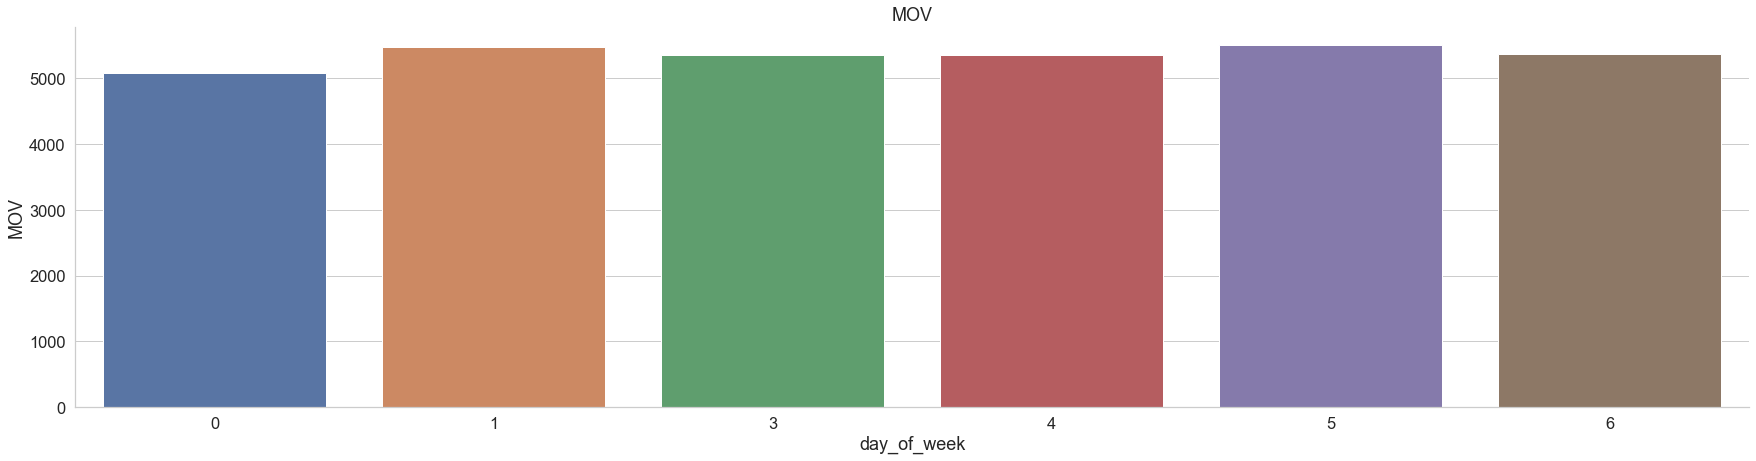

In [75]:
sns.barplot(data = day_of_week_metrics, x = 'day_of_week', y = 'MOV')
sns.despine()
plt.title('MOV')
plt.show()

#### Вывод по DAU по сумме заказов, AOV, MOV:
- Суммарный доход в заказов в день изменяется циклично! С нулевого дня по третий день он падает, и то же самое происходит с 4 по 6 день. Самый высокий доход приходится на 0,4,5 день, самый низкий на 3 день
- Та же закономерность сохраняется и для AOV
- Для MOV наблюдается другая картина: распределение по дням равномерное.


## Дни: Количество товаров

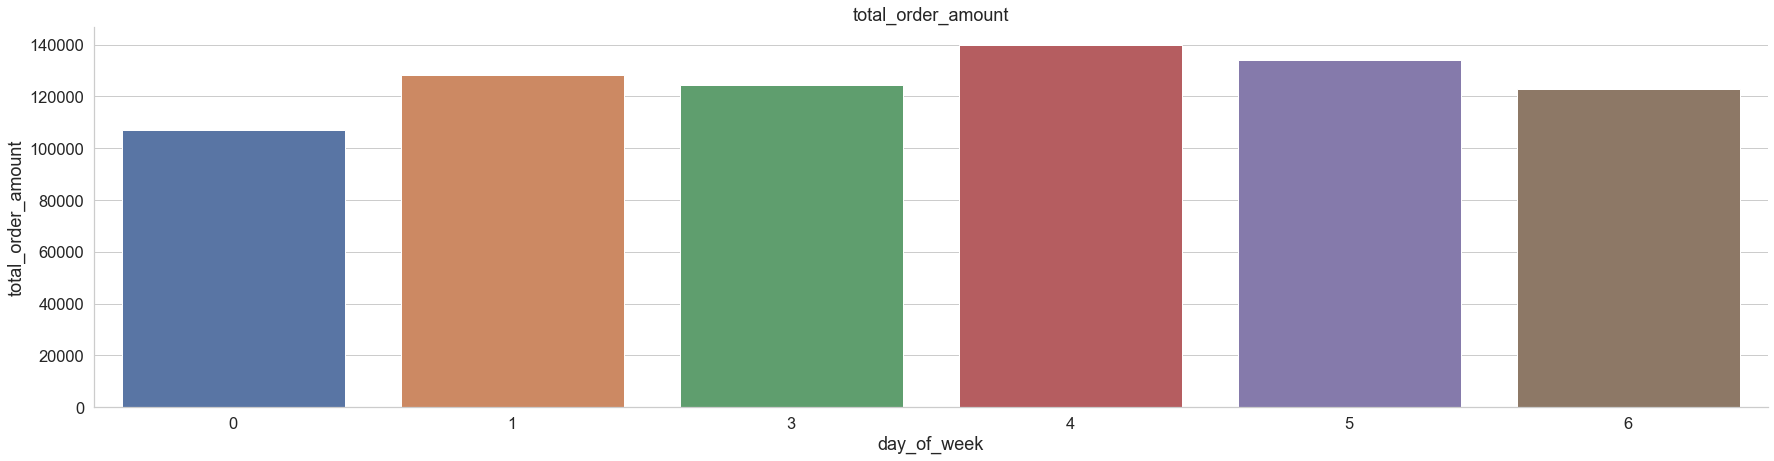

In [76]:
sns.barplot(data = day_of_week_metrics, x = 'day_of_week', y = 'total_order_amount')
sns.despine()
plt.title('total_order_amount')
plt.show()

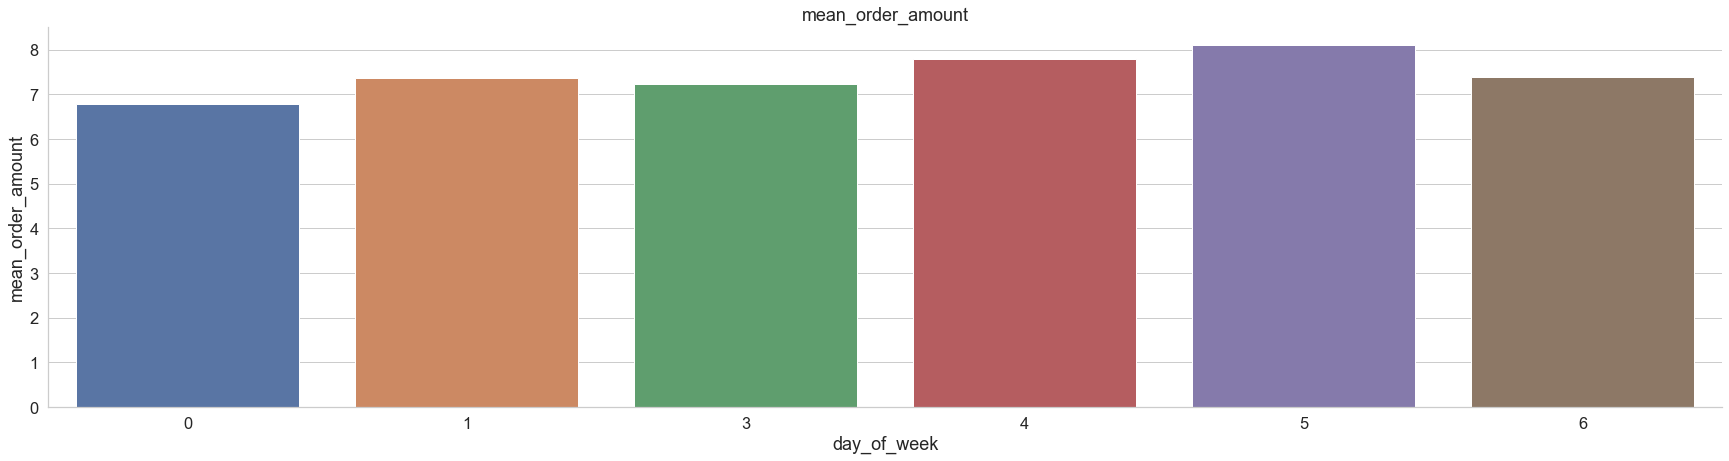

In [77]:
sns.barplot(data = day_of_week_metrics, x = 'day_of_week', y = 'mean_order_amount')
sns.despine()
plt.title('mean_order_amount')
plt.show()

#### Вывод по товарам:
Больше всего товаров суммарно было продано в 4 день, меньше всего - в 0 день. Распределение средних более сглаженно, лидирует 5 день, меньше всего средняя в 0 день.

## Часы: уникальные заказы, суммы заказов

In [78]:
hour_metrics = df.groupby('hour_of_day', as_index = False).agg({'order_id' :'nunique', 'order_value': 'sum'})
hour_metrics.head()

,hour_of_day,order_id,order_value
0,0,519,16156999
1,1,235,39343581
2,2,119,1974964
3,3,116,3914667
4,4,108,4715260


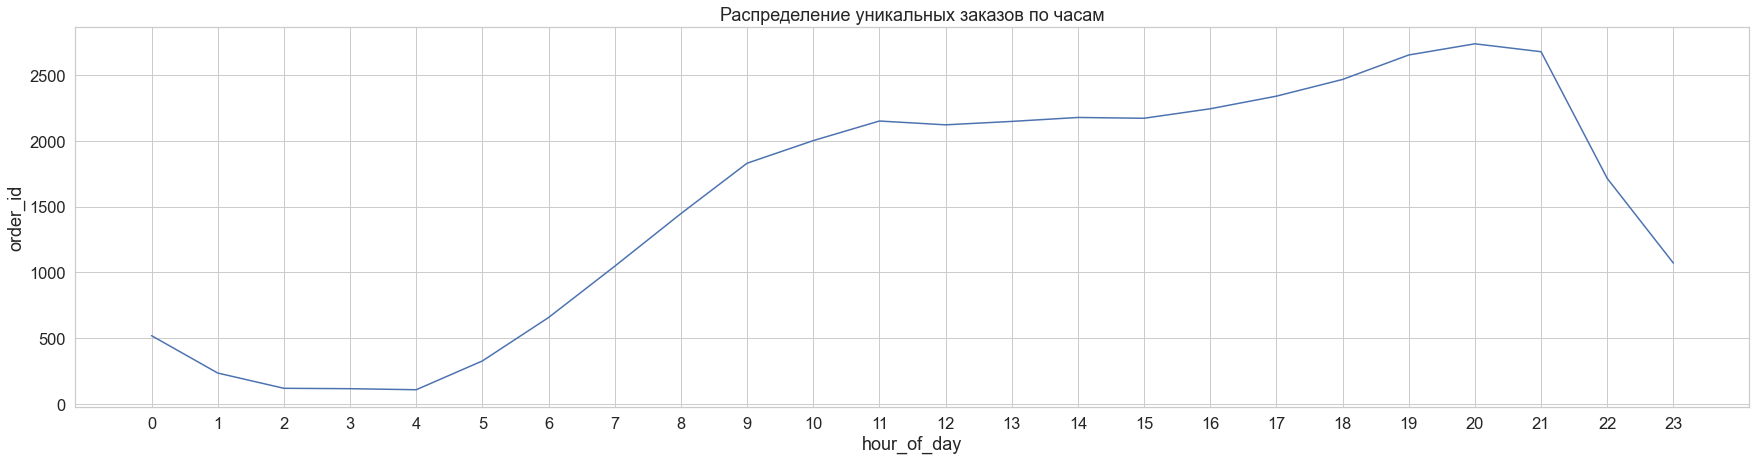

In [79]:
sns.lineplot(data = hour_metrics, x = 'hour_of_day', y = 'order_id')
plt.title('Распределение уникальных заказов по часам')
plt.xticks([i for i in range(24)])
plt.show()

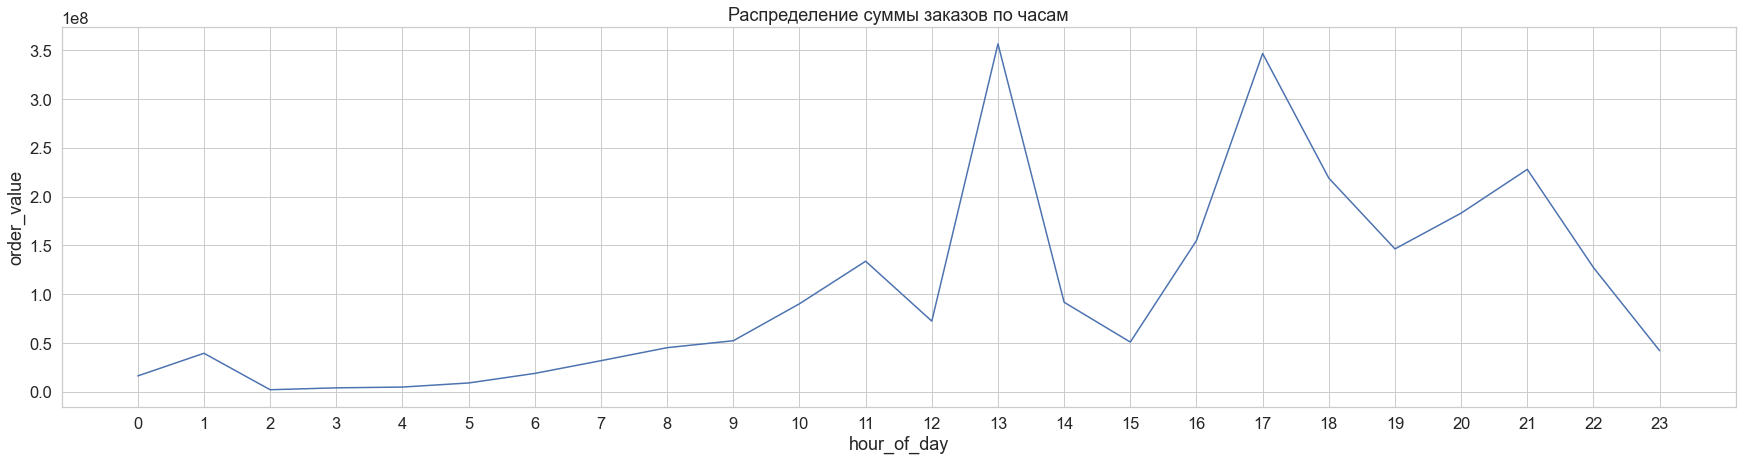

In [80]:
sns.lineplot(data = hour_metrics, x = 'hour_of_day', y = 'order_value')
plt.title('Распределение суммы заказов по часам')
plt.xticks([i for i in range(24)])
plt.show()

### Вывод по часам и заказам
- За эти 6 дней меньше всего заказов было совершено в период с 0 до 4 часов ночи, с 4 до 9 часов идёт активный рост числа заказов, с 9 до 21 рост продолжается, но не с такой скоростью. С 21 по 23 наблюдается резкий спад. Самым активным временем заказов можно считать период с 18 до 21 часа.
- График распределения сумм заказов не такой плавный, как график количества заказов. Здесь есть пики - 1 час, 11 часов 13 часов, 17 часов и 21 час. Самыми прибыльными часами можно назвать 13 и 17 часов. Самые низкая прибыль пришлась на 2 часа ночи, в целом период с 2 до 7 можно считать наименее прибыльным.


### Топовые клиенты

#### Отбор топовых клиентов

Нам уже известно, что среди клиентов есть люди, заплатившие очень крупные суммы. Хочу посмотреть по квантилям на самых крупных игроков!

In [81]:
check_items_by_client.revenue_by_client.quantile([0.5, 0.8, 0.85, 0.9, 0.95, 0.99])

0.50     4116.00
0.80    11036.20
0.85    13863.00
0.90    18725.80
0.95    28962.40
0.99    78773.28
Name: revenue_by_client, dtype: float64

In [82]:
print('mean :', check_items_by_client.revenue_by_client.mean())

mean : 28966.473460798898


In [83]:
print('max :', check_items_by_client.revenue_by_client.max())

max : 124217597


Как видно, квантили выглядят естественными для такого среднего. 95 квантиль уже практически равен значению средней. Есть совсем крупный клиент! Чтобы понять, как лучше обозначить границы крупных игроков, посмотрю сначала на распределение дохода с 95 квантиля

In [84]:
q_95_revenue_by_client = check_items_by_client.revenue_by_client.quantile(0.95)

In [85]:
check_items_by_client_q_95 = check_items_by_client \
    .loc[check_items_by_client['revenue_by_client'] >= q_95_revenue_by_client]

In [86]:
check_items_by_client_q_95.describe().round(1)

,revenue_by_client,amount_by_client
count,1379.0,1379.0
mean,468031.3,15.7
std,5425167.1,20.0
min,28963.0,1.0
25%,34153.0,5.0
50%,44424.0,10.0
75%,68402.0,20.0
max,124217597.0,356.0


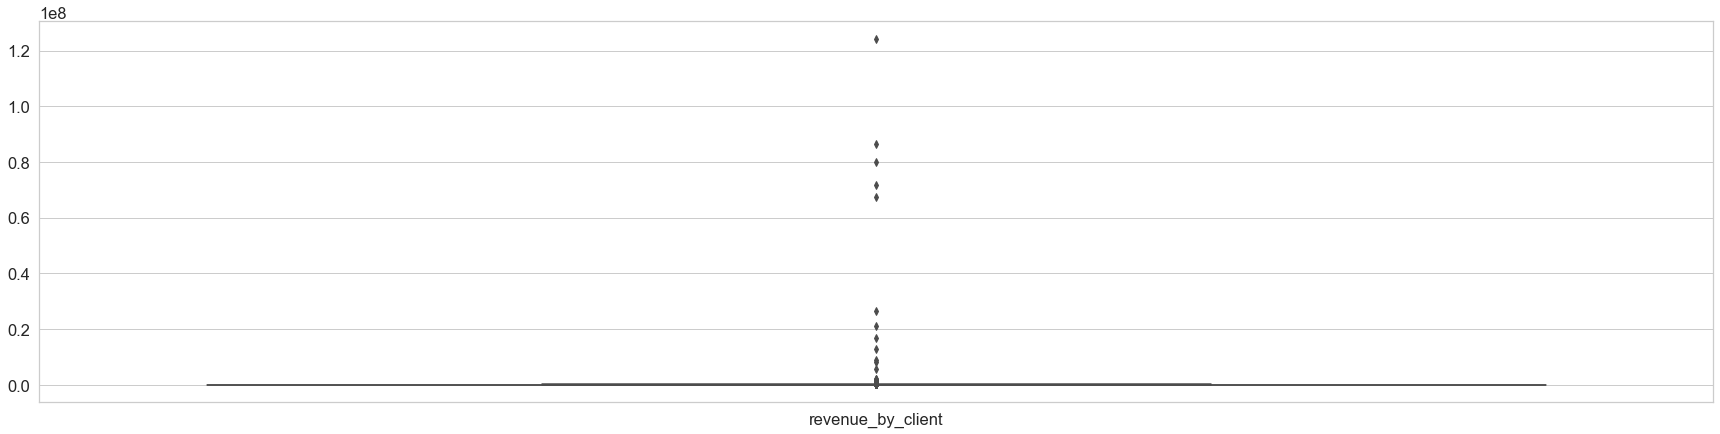

In [87]:
sns.boxplot(data = check_items_by_client_q_95[['account_id','revenue_by_client']])
plt.show()

Как видно, даже при квантиле в 0.95 выбросов остаётся всё ещё много, при этом очень крупных! Попробую взять квантиль 0.99

In [88]:
q_99_revenue_by_client = check_items_by_client.revenue_by_client.quantile(0.99)

In [89]:
check_items_by_client_q_99 = check_items_by_client \
    .loc[check_items_by_client['revenue_by_client'] >= q_99_revenue_by_client]

In [90]:
check_items_by_client_q_99.describe().round(1)

,revenue_by_client,amount_by_client
count,276.0,276.0
mean,2165696.6,28.8
std,11994427.1,35.9
min,78932.0,1.0
25%,102484.0,9.0
50%,143982.5,20.5
75%,281652.5,35.2
max,124217597.0,356.0


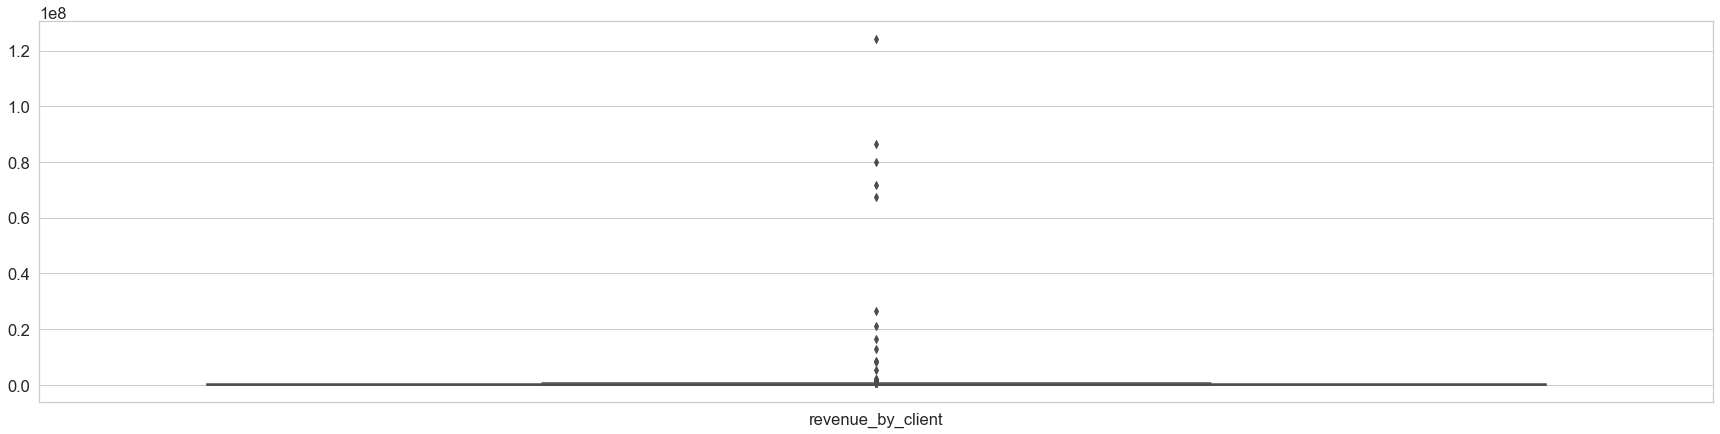

In [91]:
sns.boxplot(data = check_items_by_client_q_99[['account_id','revenue_by_client']])
plt.show()

Создаю список с айдишниками крупных клиентов, отбираю отдельный дф с информацией по ним

In [92]:
top_clients = check_items_by_client_q_99.account_id.to_list()

In [93]:
print('Количество топовых клиентов = ', len(top_clients))

Количество топовых клиентов =  276


In [94]:
df_top_clients = df.query('account_id in @top_clients')

In [95]:
df_top_clients.head(3)

,day_of_week,hour_of_day,city_id,item_value,items_amount,order_id,account_id,l1_category_title,l2_category_title,l3_category_title,last_level_category_title,sum_item_value,order_value,order_amount,revenue_by_client,amount_by_client
217,6,23,44,4199,1,61ed414510f0ba42095b2c295cf58a50,bcab86030d33a0aaa695edcb0c99135f,Электроника,Умные часы и фитнес браслеты,Ремешки,Ремешки,4199,4199,1,79970,7
218,6,22,44,11792,1,eb1feb18aa72f78cf6bc3fc81d67edad,bcab86030d33a0aaa695edcb0c99135f,Бытовая техника,Техника для красоты и здоровья,Стрижка волос,Триммеры для волос,11792,56848,3,79970,7
219,6,22,44,11667,1,eb1feb18aa72f78cf6bc3fc81d67edad,bcab86030d33a0aaa695edcb0c99135f,Канцтовары,Бумажная продукция,Еженедельники и ежедневники,Еженедельники и ежедневники,11667,56848,3,79970,7


In [96]:
check_items_by_client['top_client'] = np.isin(check_items_by_client.account_id, top_clients)

#### Доход от топовых vs доход от остальных клиентов

Теперь мы видим айдишники покупателей, которые делали довольно крупные заказы. Интересно посмотреть, каково соотношение суммарного дохода, которую принесли покупатели, покупавшие товары по цене выше 99 квантиля с покупателями ниже этого квантиля. Статистически оценить это можно с помощью jackknife

- H0: суммарный доход от топ-клиентов и обычных клиентов статистически значимо не различается
- H1: суммарный доход от топ-клиентов и обычных клиентов статистически значимо  различается

In [97]:
top_value_sum = check_items_by_client.query('top_client == True').revenue_by_client.sum()
print('Суммарный доход от топовых клиентов : ', top_value_sum)

Суммарный доход от топовых клиентов :  597732273


In [98]:
not_top_value_sum = check_items_by_client.query('top_client == False').revenue_by_client.sum()
print('Суммарный доход от обычных клиентов : ', not_top_value_sum)

Суммарный доход от обычных клиентов :  200670635


Те жа различия суммарного дохода в графиках:

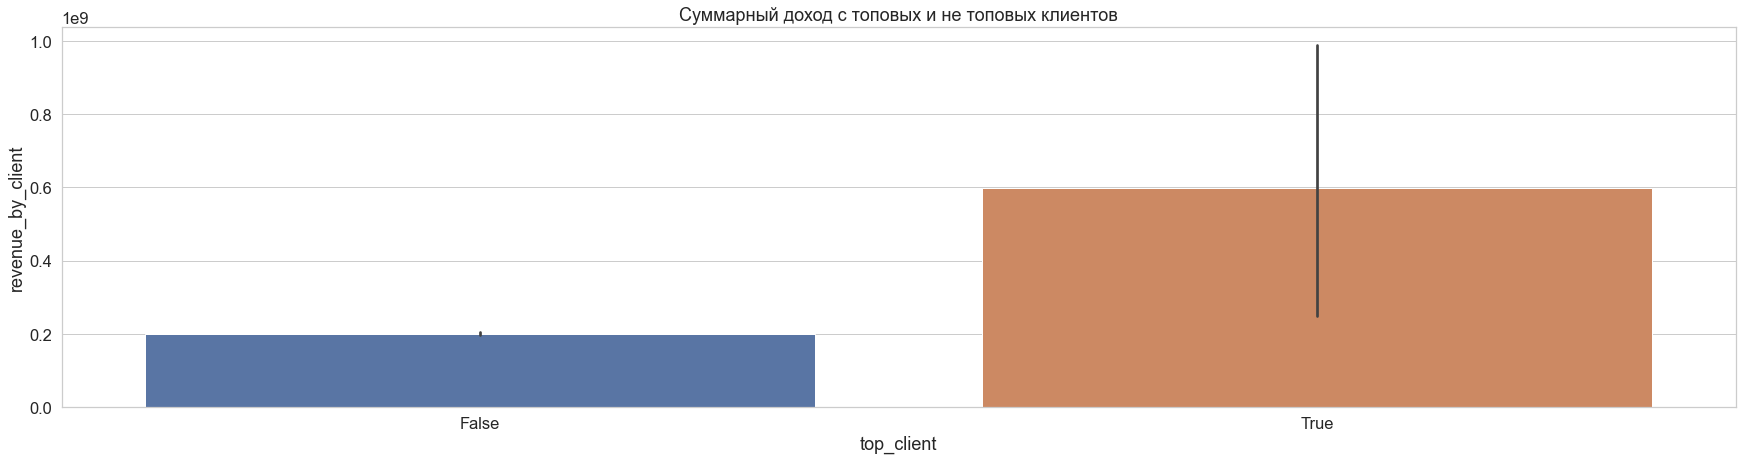

In [99]:
sns.barplot(data = check_items_by_client, x = 'top_client', y = 'revenue_by_client', estimator = sum )
plt.title('Суммарный доход с топовых и не топовых клиентов')
plt.show()

#### Вывод по суммарному доходу
Видно, что разница в доходе значительная. Доверительные интервалы, построенные с помощью метода складного ножа, не пересекаются, что позволяет сделать вывод о том, что суммарный доход от топ-клиентов и обычных клиентов статистически значимо различается, отклоняем нулевую гипотезу.

### Кто такие топовые клиенты?

Вернёмся к дф с информацией по топовым клиентам. Есть ли дисбаланс городов? Что они чаще всего покупают?

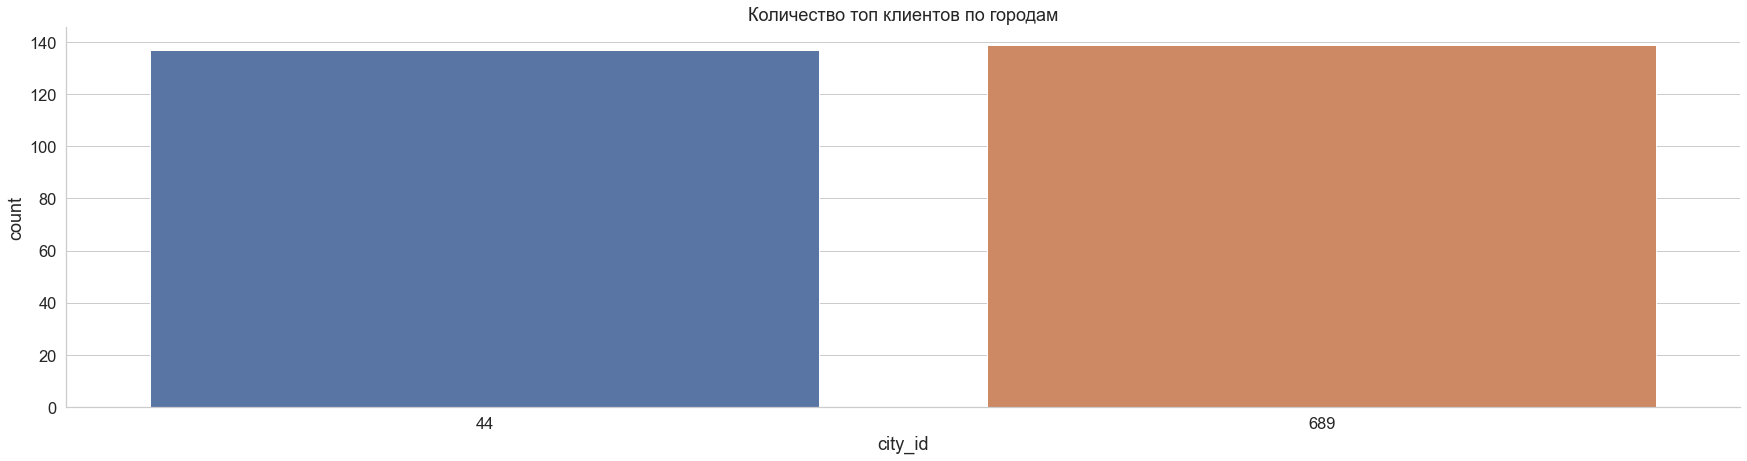

In [100]:
sns.countplot(data = df_top_clients.drop_duplicates('account_id'), x = 'city_id')
sns.despine()
plt.title('Количество топ клиентов по городам')
plt.show()

Едва ли такое распределени частот будет статистически значимо различным, но проверим это с помощью хи-квадрат
- H0: Статистически значимой взаимосвязи между количеством топовых клиентов и городом нет
- H1: Статистически значимая взаимосвязь между количеством топовых клиентов и городом есть

In [101]:
crosstab_id_top_city = df_top_clients.groupby('city_id').agg({'account_id' :'nunique'})

In [102]:
crosstab_id_top_city

,account_id
city_id,
44,137
689,139


In [103]:
g, p, dof, expctd = stats.chi2_contingency(crosstab_id_city)
print(p)

1.0


#### Вывод по городам и топ клиентам
Статистически значимой взаимосвязи между количеством топовых клиентов и городом не выявлено, принимаем нулевую гипотезу, p = 1

### Какие категории товаров наиболее востребованы у топ-клиентов?

In [104]:
df_top_clients.l1_category_title.value_counts()

Электроника                       393
Красота                           286
Товары для дома                   256
Хобби и творчество                208
Канцтовары                        203
Одежда                            192
Автотовары                        172
Аксессуары                        163
Бытовая химия и личная гигиена    135
Спорт и отдых                     107
Детские товары                     88
Строительство и ремонт             76
Книги                              63
Здоровье                           63
Зоотовары                          58
Бытовая техника                    44
Продукты питания                   27
Обувь                              20
Дача, сад и огород                 18
Товары для взрослых                13
Name: l1_category_title, dtype: int64

Похоже на то, что происходит и с другими клиентами, самые востребованные категории: электроника, красота, товары для дома.

Можно предположить, что среди топ-клиентов есть магазины. Проверю, так ли это, посмотрев на количество категорий товаров клиентов

In [105]:
top_clients_ctg = df_top_clients.groupby(['account_id', 'l1_category_title'], as_index= False) \
    .agg({'item_value' : 'count'}).sort_values('item_value', ascending = False)
top_clients_ctg.head()

,account_id,l1_category_title,item_value
376,6b07e8493fb9c9988bba0663dc776402,Бытовая химия и личная гигиена,64
754,edf935bce44fca2061f1b6d69a9991ba,Книги,49
757,efe43aa78a8986a959fc18b930eb9df7,Автотовары,48
241,51dfb279aece0a4c8a3ca8a3ba900f13,Хобби и творчество,39
60,16b46d7d8dc37021c000a59e9a5aac2e,Электроника,29


In [106]:
#рассчёт уникальных категорий для каждого клиента
ctg_number_top = top_clients_ctg.groupby('account_id').l1_category_title.nunique() \
    .to_frame().reset_index().rename(columns = {'l1_category_title' : 'ctg_count'})

In [107]:
df_top_clients = df_top_clients.merge(ctg_number_top, on = 'account_id')

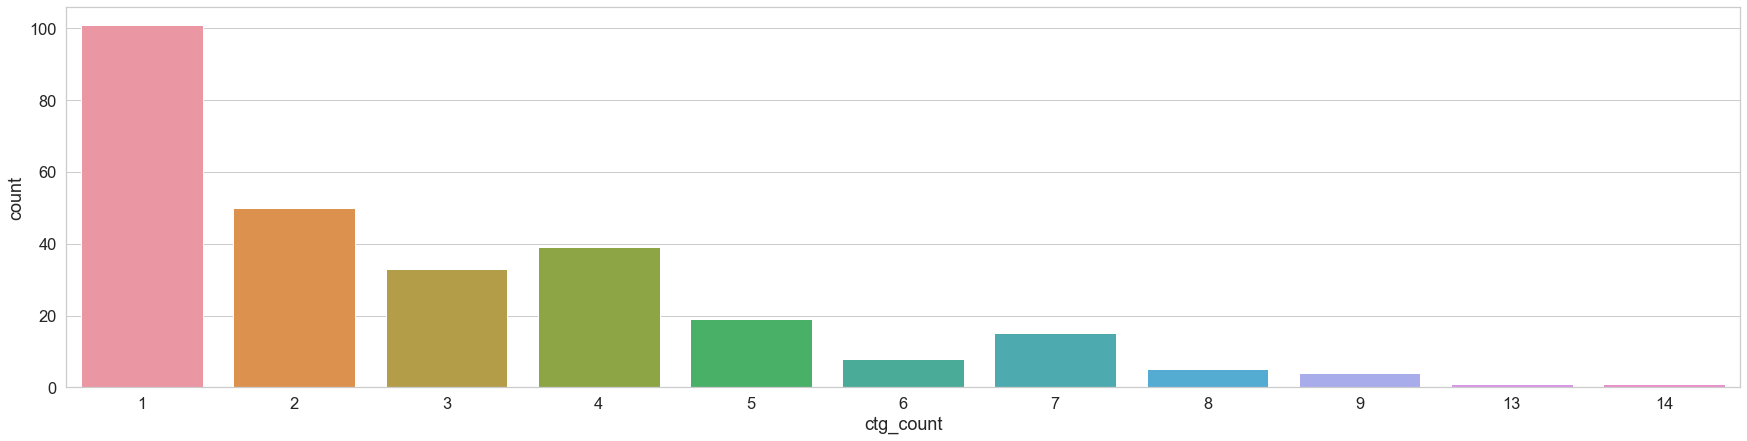

In [126]:
sns.countplot(data = df_top_clients.drop_duplicates('account_id'), x = 'ctg_count')
plt.show()

In [129]:
df_top_clients.drop_duplicates('account_id').ctg_count.value_counts(normalize = True)

1     0.365942
2     0.181159
4     0.141304
3     0.119565
5     0.068841
7     0.054348
6     0.028986
8     0.018116
9     0.014493
13    0.003623
14    0.003623
Name: ctg_count, dtype: float64

#### Вывод по топ клиентам и категориям:
- Похоже на то, что происходит и с другими клиентами, самые востребованные категории: электроника, красота, товары для дома.
- Есть клиенты-магазины, которые закупали только товары одной категории, они составляют 36 % от числа топ клиентов

### Общий вывод по топ клиентам:
- Топ клиенты были отобраны от 99 квантиля(включительно) и выше  по доходу
- Количество топовых клиентов =  276
- Разница в доходе от топ клиентов и обычных значительная. Доверительные интервалы, построенные с помощью метода складного ножа, не пересекаются, что позволяет сделать вывод о том, что суммарный доход от топ-клиентов и обычных клиентов статистически значимо различается.
- Статистически значимой взаимосвязи между количеством топовых клиентов и городом не выявлено, их количество в городах примерно одинаково. Хи-квадрат
- Самые востребованные категории: электроника, красота, товары для дома.
- Есть клиенты-магазины, которые закупали только товары одной категории, они составляют 36 % от числа топ клиентов

## Результаты
### EDA
#### Самые общие распределения: распределение чеков, дохода от покупателей, количества вещей в заказе, количества вещей на покупателя
- В данных есть как и товары с нулевой стоимостью, так и товар на огромную сумму. Соответственно, есть и заказы с нулевой суммой. При дальнейшем анализе нулевых покупок я предположила две возможно причины их наличия: 
    - Возможно, есть какая-то ошибка при записи данных
    - Бонусная система, позволяющая полностью оплатить покупку. Нулевые товары принадлежат к разным категориям, так что вполне вероятно, что так оно и есть
- И для чеков, и для количества товаров в корзине есть выбросы, что отдаляет распределения от нормальных. В случае чеков среднее практически в 7 раз больше, чем медиана, в случае количества товаров средняя лишь в полтора раза больше медианы.
- И для суммарного дохода с клиента, и для числа товаров на клиента есть выбросы и расхождение значений средних и медиан. Средний доход с пользователя примерно в 7 раз выше, чем медиана. Среднее значение количества товаров на клиента примерно в полтора раза больше медианы.
- Существует слабая взаимосвязь между доходом с клиента и количеством приобретённых им товаров(r Пирсона = 0.11) 

#### Категории: доход и товары
- Большую часть дохода приносит категория "электроника", остальные категории значительно отстают. Средний доход с категорий сохраняет ту же тенденцию.

- Тем не менее, само количество проданных товаров распределено не так резко! Здесь также лидер электроника, на втором месте красота, на третьем - товары для дома. Зато среднее количество проданных товаров имеет другое распределение: здесь первые места занимают продукты питания, строительство и канцтовары, а элетроника, бытовая техника, товары для взрослых находятся в конце. Это можно объяснить просто: чем дешевле товар, тем больше его единиц покупают, тогда как электронику и бытовую технику берут в небольшом количестве.

#### Города: заказы(AOV, MOV), категории, клиенты(уники, ARPU, MRPU, DAU)

- Суммарно доход с города 689 выше, чем доход с города 44. 
- AOV по полным выборкам, включающим выбросы, статистически значимо не различается. - Welch ttest
- AOV по выборкам без выбросов(усечённое среднее), статистически значимо выше в городе 44.  - Welch ttest
- MOV(медиана суммы заказа) по полным выборкам статистически значимо выше у города 44. - Bootstrap

- Клиентов в городе 689 больше, чем в 44, но не статистически значимо. - Хи-квадрат 
- ARPU по полным выборкам, включающим выбросы, статистически значимо не различается. - Welch ttest
- ARPU по выборкам без выбросов(усечённое среднее), статистически значимо выше в городе 44.  - Welch ttest
- MRPU(медиана дохода с пользователя) по полным выборкам статистически значимо выше у города 44. - Bootstrap
- DAU за каждый день выше у города 689. Для города 44 DAU последовательно растёт по городам, DAU для города 689 растёт с 1 по 4 день, падает на уровень третьего в пятый день, и достигает максимума в 6 день

- Большая часть дохода для обоих городов приходится на категорию электроники, для города 689 этот доход выше, для среднего дохода соотношение сохраняется. 

- Больше всего было продано товаров из категории электроники, красоты, товаров для дома, во всех трёх категориях было больше продано в городе 689. По среднему количеству проданных товаров лидируют продукты питания, строительство и ремонт, канцтовары. Для первых двух категорий среднее значение выше для города 689, для канцтоваров город 44

#### Дни: DAU, заказы(AOV, MOV), количество вещей в заказе
- Суммарный доход в заказов в день изменяется циклично! С нулевого дня по третий день он падает, и то же самое происходит с 4 по 6 день. Самый высокий доход приходится на 0,4,5 день, самый низкий на 3 день
- Та же закономерность сохраняется и для AOV
- Для MOV наблюдается другая картина: распределение по дням равномерное.
- DAU выглядит равномерным, больше всего клиентов было в 4 день, меньше всего в 5 день. 
- Статистически значимой взаимосвязи между DAU и днём нет. - Хи-квадрат
- Распределение заказов по дням повторяет DAU: выглядит равномерным, больше всего клиентов было в 4 день, меньше всего в 5 день.
- Больше всего товаров суммарно было продано в 4 день, меньше всего - в 0 день. Распределение средних более сглаженно, лидирует 5 день, меньше всего средняя в 0 день.

#### Часы: уникальные заказы, суммы заказов

- За эти 6 дней меньше всего заказов было совершено в период с 0 до 4 часов ночи, с 4 до 9 часов идёт активный рост числа заказов, с 9 до 21 рост продолжается, но не с такой скоростью. С 21 по 23 наблюдается резкий спад. Самым активным временем заказов можно считать период с 18 до 21 часа.
- График распределения сумм заказов не такой плавный, как график количества заказов. Здесь есть пики - 1 час, 11 часов 13 часов, 17 часов и 21 час. Самыми прибыльными часами можно назвать 13 и 17 часов. Самые низкая прибыль пришлась на 2 часа ночи, в целом период с 2 до 7 можно считать наименее прибыльным.

#### Топовые клиенты
- Топ клиенты были отобраны от 99 квантиля(включительно) и выше  по доходу
- Количество топовых клиентов =  276
- Разница в доходе от топ клиентов и обычных значительная. Доверительные интервалы, построенные с помощью метода складного ножа, не пересекаются, что позволяет сделать вывод о том, что суммарный доход от топ-клиентов и обычных клиентов статистически значимо различается.
- Статистически значимой взаимосвязи между количеством топовых клиентов и городом не выявлено, их количество в городах примерно одинаково. Хи-квадрат
- Самые востребованные категории: электроника, красота, товары для дома.
- Есть клиенты-магазины, которые закупали только товары одной категории, они составляют 36 % от числа топ клиентов

### Основные метрики
Перечисленные ниже метрики посчитаны в коде в тех или иных разрезах. 
 - ARPU
 - MRPU
 - AOV
 - MOV
 - DAU
 
 Также есть метрики, за которыми стоит следить в маркетплейсе, но их посчитать не основе полученных данных не получится
 - MAU, WAU
 - retention
 - ARPPU
 - LTV
 
**На основе проведённого анализа можно предложить следующие улучшения для продукта:**
- Известно, что более прибыльные заказы совершаются в в 13 и 17 часов. Можно настроить пуши конкретно на это время с напоминаниями о просмотренных товарах/выгодных предложениях. Это повлияет на **ARPU, ARPPU, DAU, retention, LTV**
- В городе 44 средний пользователь платит больше. Им можно предлагать более дорогие товары, чем пользователям города 689. Это повлияет на **ARPU, AOV, LTV**
- Электроника, красота, товары для дома - это те категории, на которые стоит обратить внимание при составлении акций, рекомендаций. Также стоит особенно проработать систему фильтрации именно для этих категорий, чтобы покупателю было легче найти нужное. Это повлияет на  **ARPU,ARRPU, AOV, LTV**
- Большая часть дохода приходится на топовых клиентов, 36% из них - клиенты-магазины. Скорее всего, они будут постоянно брать примерно один и тот же набор товаров. Им можно сообщать о снижении цен и акциях на эти товары, а также предлагать альтернативные по меньшей цене.  Это повлияет на **ARPU, AOV, DAU, retention, LTV**

### Искусственный эксперимент
Результаты по эксперименту обобщённо изложены выше, в самом коде всё обсуждается подробнее. 

Помимо произведённых тестов следует выяснить, что происходит с метриками, которые тяжело сосчитать на приведённых данных: LTV, ARPPU, retention. В обоих городах есть выбросы, которые сильно влияют на оценку тестов, и нужно больше времени, чтобы понять, насколько эти значения-выбросы устойчивы, какие из топовых клиентов постоянны, а какие нет.

#### Раскатывать ли фичу?
Если считать город 44 контрольным, а 689 экспериментальным, **раскатывать фичу не стоит**, потому что:

- Суммарно доход с города 689 выше, чем доход с города 44. 
- AOV по полным выборкам, включающим выбросы, статистически значимо не различается. - Welch ttest
- AOV по выборкам без выбросов(усечённое среднее), статистически значимо выше в городе 44.  - Welch ttest
- MOV(медиана суммы заказа) по полным выборкам статистически значимо выше у города 44. - Bootstrap

- Клиентов в городе 689 больше, чем в 44, но не статистически значимо. - Хи-квадрат 
- ARPU по полным выборкам, включающим выбросы, статистически значимо не различается. - Welch ttest
- ARPU по выборкам без выбросов(усечённое среднее), статистически значимо выше в городе 44.  - Welch ttest
- MRPU(медиана дохода с пользователя) по полным выборкам статистически значимо выше у города 44. - Bootstrap

Статистически значимой разницы по полной выборке нет, без выбросов AOV и ARPU статистически значимо выше у города 44, как и медиана по полным выборкам, что сходится. Статистически значимой разницы по количеству клиентов для двух городов нет. Да, суммарно доход выше с города 689 - но это, скорее всего, случайный результат, связанный, например, с тем, что эксперимент пришёлся на дату закупки оптовика из города 689